# <h1 style='background:#682F2F; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:white'><center>DIAMOND PRICE PREDICTION: REGRESSION</center></h1> 
 
![New Image](https://static.wixstatic.com/media/14e713_0999b55911954505a750e6ea195c41dc~mv2.jpg/v1/fill/w_740,h_493,al_c,lg_1,q_85,enc_auto/14e713_0999b55911954505a750e6ea195c41dc~mv2.jpg)  

<h1 style='background:#682F2F; border:0; border-radius: 10px; color:white'><center>TABLE OF CONTENTS</center></h1>

### [**1. IMPORTING LIBRARIES**](#title-one)
    
### [**2. LOADING DATA**](#title-two)

### [**3. DATA ANALYSIS**](#title-three)

### [**4. DATA PREPROCESSING**](#title-four)

### [**5. MODEL BUILDING**](#title-five) 

### [**6. END**](#title-six)


In [1]:
# Summary :
# STEP 1 :
# STEP 2 :
# STEP 3 :
    # import libraries
    # meet dataa
    #Data Cleaning: 
        #Correcting --> We deal with outliers,aberrant values and making order.
        #Completing --> We have no null values so we will skip that part
        #Creating --> we do not need to creating new values so  we will skip that part
        #Converting --> We deal with labels
        
# STEP 4 : Perform Exploratory Analysis with Statistics
        #Corelation between discrete variables and  dependent variable.
        # Histogram
        # density graphs
        # evaluate dependent variables together with target variable
        # Corelation Matrix

# STEP 5 : Model Data
    # split test-train
    # Choose the best algorithm for that data (using pipline)
    # prediction with best algorithm
    # MODEL TUNİNG
    # Optimize the parameters for best algorithm
    # predict with tuned final model

## STEP 1 : Define The Problem
* We want to predict the diamond price.
* This is a regression problem.

## STEP 2 : Collect The Data,
* we take the date from Kaggle platform.

## STEP 3 : Prepare Data for Consumption
*

### 3.1 : Import Libraries

In [2]:
#All the libralies 

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, tree, linear_model, neighbors, ensemble
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn. linear_model import Lasso , Ridge ,ElasticNet
from lightgbm import LGBMRegressor

### >> 3.2 Meet  Data 

* The dataset contains the prices and other attributes of nearly 54,000 diamonds. There are 10 attributes
* Feature description:
* price : It ranges from $18,823 and $326.This is our outcome or dependent variable (target variable)--> y
* cut : It is related to physical attribute of diamonds and it is a categorical and ordinal variable.We can think that it is related to quality. -->Fair < Good < Very Good < Premium < Ideal
* color : J (worst) to D (best) - it is a categorical and ordinal variable
* carat : The carat is related to the diamond’s physical weight. It ranges from 0.2 and 5.01.
* clarity : I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best) --> it is a categorical and ordinal variable.
* Dimensions -> x,y,z
* x : length in mm (0--10.74)
* y : width in mm (0--58.9)
* z : depth in mm (0--31.8)
* depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) --> it ranges from (43--79)
* table : width of top of diamond relative to widest point (43--95) -> continious varible

In [116]:
# import my data
diamond_data = pd.read_csv('diamonds.csv')

#copy
data1 = diamond_data.copy()

In [117]:
data1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# There are "unnamed" column but we actually know that it represent our index numbers.
#I mean it is supposed that the index numbers as variable
# We need to fix the problem.

In [6]:
data1 = data1.iloc[:,1:len(data1)]
#  get the all observation --> :  
# then go to  1. from the length of dataframe. 1 : len(data1) 
# I use "iloc" because ı need to  arrange by indexes 
# alternative way to fix it --> data1 = data1.drop(["Unnamed: 0"], axis=1)

In [7]:
data1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
# I get some informations about my data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
data1.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
31863,0.30,Premium,H,VVS2,62.1,52.0,776,4.31,4.29,2.67
34939,0.31,Good,I,SI1,64.3,55.0,377,4.27,4.29,2.75
16439,2.22,Fair,H,I1,70.1,55.0,6564,7.77,7.74,5.44
39020,0.43,Premium,I,IF,61.2,58.0,1056,4.83,4.88,2.97
11681,1.11,Ideal,G,SI1,62.6,57.0,5061,6.64,6.59,4.14
21625,2.43,Premium,G,I1,61.7,60.0,9716,8.54,8.49,5.25
35450,0.32,Ideal,E,VS2,62.9,56.0,900,4.39,4.36,2.75
43810,0.51,Premium,G,VS2,62.6,57.0,1443,5.15,5.10,3.21
50389,0.78,Very Good,H,SI2,61.8,59.0,2252,5.85,5.90,3.63
4560,0.93,Very Good,G,SI2,60.8,62.0,3644,6.29,6.34,3.84


In [10]:
data1.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [11]:
data1.shape
# 53940 observations and 10 variables

(53940, 10)

In [12]:
# check variable names
data1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [13]:
# check if my data has missing datas  or not
# train veri setimdeki eksik değerleri check ediyorum 
data1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

 ### >>3.21 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

In [14]:
# In that part We also use data visualization techniques
# Correcting -> We deal with outliers,aberrant values and making order.
# Completing ->  we have no null values so we will skip that part
# Creating ->  we do not need to creating new values so  we will skip that part
# Conveting -> We deal with it (labels)

In [15]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [16]:
###Correcting 
# When we check it ,we can see that there are some aberrant values that means there are  dimensionless or 2-dimensional diamonds.
# We have to correct this

In [17]:
# We should reach the index which x = 0 
data1 = data1.drop(data1[data1["x"]==0].index)

# We should reach the index which y = 0 
data1 = data1.drop(data1[data1["y"]==0].index)

# We should reach the index which z = 0 
data1 = data1.drop(data1[data1["z"]==0].index)

In [18]:
# DO NOT  CONFUSED

In [19]:
data1["x"][0]

3.95

In [20]:
data1[data1["x"]==0].index

Index([], dtype='int64')

In [21]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53920.0,0.797698,0.473795,0.20,0.40,0.70,1.04,5.01
depth,53920.0,61.749514,1.432331,43.00,61.00,61.80,62.50,79.00
table,53920.0,57.456834,2.234064,43.00,56.00,57.00,59.00,95.00
price,53920.0,3930.993231,3987.280446,326.00,949.00,2401.00,5323.25,18823.00
x,53920.0,5.731627,1.119423,3.73,4.71,5.70,6.54,10.74
y,53920.0,5.734887,1.140126,3.68,4.72,5.71,6.54,58.90
z,53920.0,3.540046,0.702530,1.07,2.91,3.53,4.04,31.80


In [22]:
data1.shape
# we had 53940 observations before deleting x=0,y=0,z=0
# now we have  53920  observations
# We lost 20 observations.

(53920, 10)

In [23]:
data1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [24]:
# check outliars

In [25]:
# ı want to see all corelation between all numeric variables.

C:\Users\saket\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saket\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saket\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\saket\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

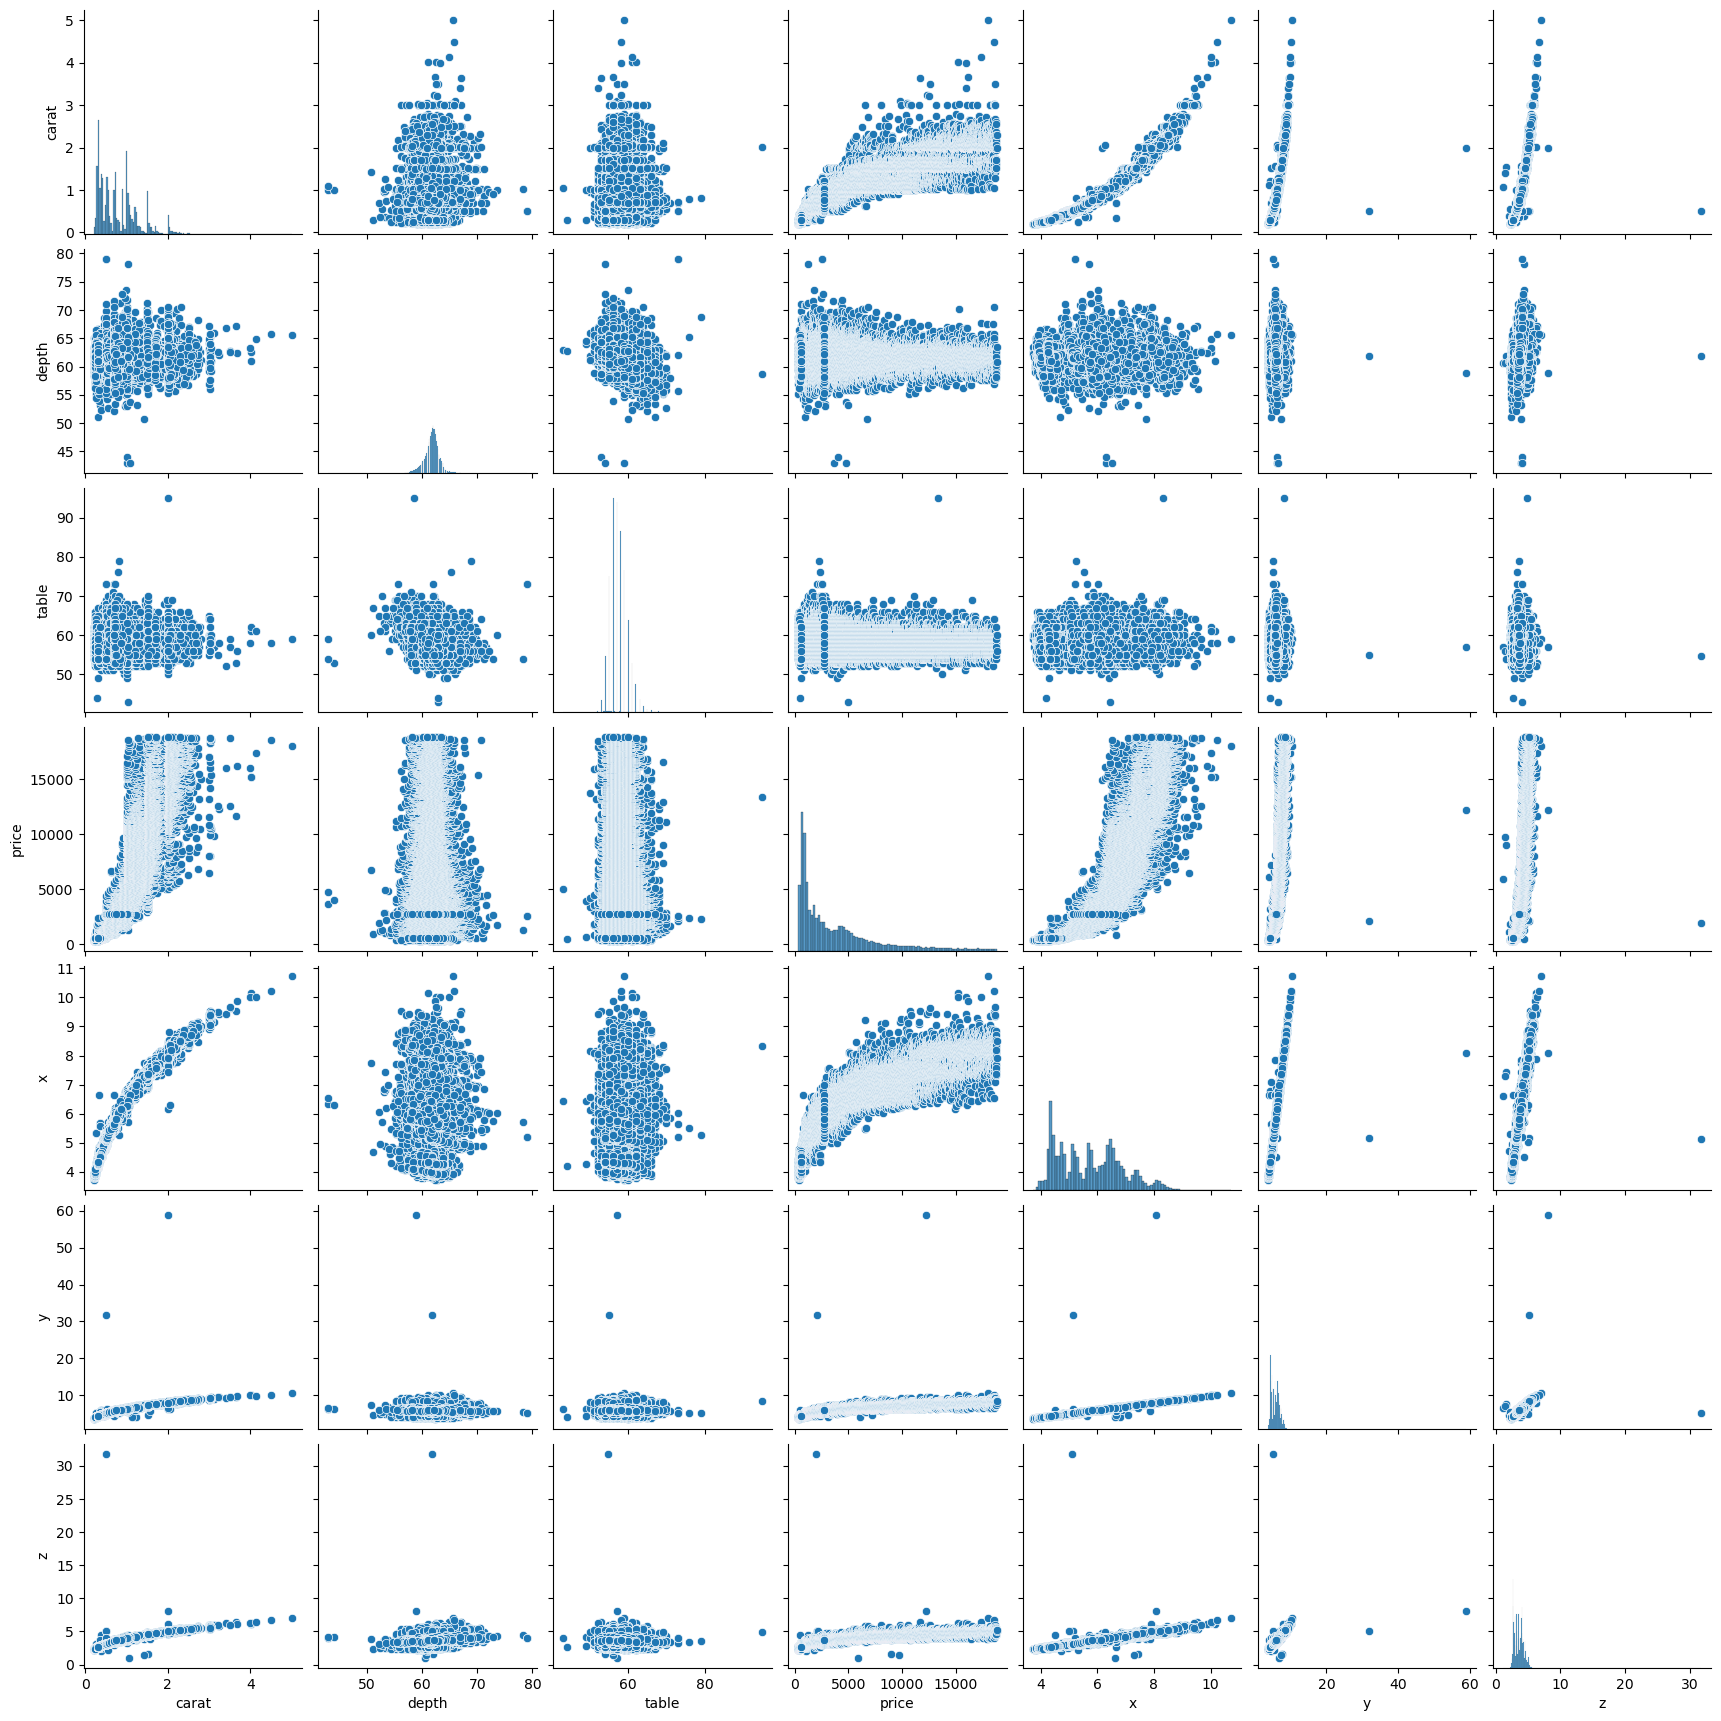

In [26]:
sns.pairplot(data1)
# you can also evalute by adding hue = "cut" or hue ="color" vs

In [27]:
# when you look at the matrix you can decide from what number to delete this  but if you can hestite the decide the number you can use that way. !
# First take the values of the variables. --> data1["z"].values
# then count by usin numpy.sum function !

In [28]:
data1["z"].values # values function returns us a numpy array
# you can check there --> type(data1["z"].values)

array([2.43, 2.31, 2.31, ..., 3.56, 3.74, 3.64])

In [29]:
z_nparray  = data1["z"].values
np.sum(z_nparray < 2.3) # I decided  2.3

10

In [30]:
# same for "table " variables
table_nparray  = data1["table"].values
np.sum(table_nparray <51) # I decided  51

7

In [31]:
# Summary: ı will drop according to these range 
# for y --> we can drop the variables y> 30
# for z --> we can drop the variables z> 30 and z <  2.3
# for depth --> we can drop the variables depth> 75 and depth <45
# for table --> we can drop the variables table> 90 and table <  51

data1 = data1[(data1["y"]<30)]
data1 = data1[(data1["z"]<30)&(data1["z"]>2.3)]
data1 = data1[(data1["depth"]<75)&(data1["depth"]>45)]
data1 = data1[(data1["table"]<80)&(data1["table"]>51)]

In [32]:
data1.shape
# we had  53920 observations and 10 variables
# now we have 53882 observations and 10 variables
# we lost 38 observations

(53882, 10)

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
data1.select_dtypes(include = ["object"]) # to see just categorical

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [35]:
# we can see how many observations there are in each class

In [36]:
data1["cut"].value_counts()

cut
Ideal        21540
Premium      13770
Very Good    12078
Good          4899
Fair          1595
Name: count, dtype: int64

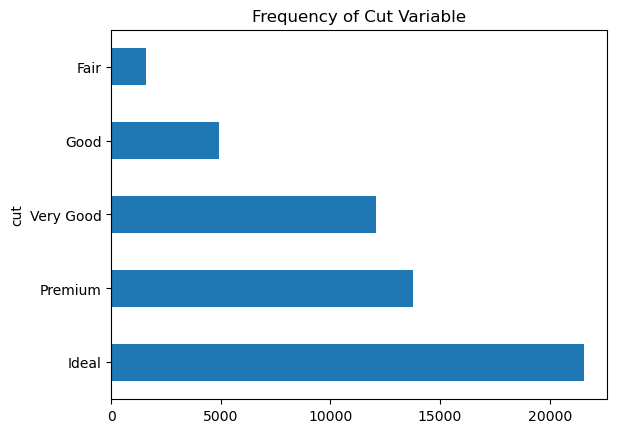

In [37]:
data1["cut"].value_counts().plot.barh().set_title("Frequency of Cut Variable");
#w/pandas

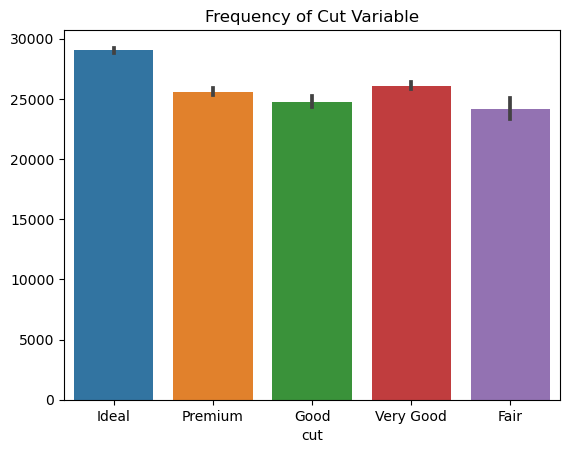

In [38]:
sns.barplot(x = "cut", y = data1.cut.index ,data = data1).set_title("Frequency of Cut Variable");
#w/seaborn

In [39]:
data1["color"].value_counts()

color
G    11282
E     9781
F     9532
H     8291
D     6772
I     5417
J     2807
Name: count, dtype: int64

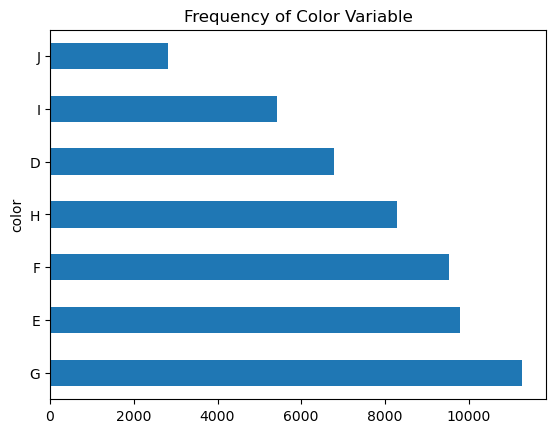

In [40]:
data1["color"].value_counts().plot.barh().set_title("Frequency of Color Variable");
#w/pandas

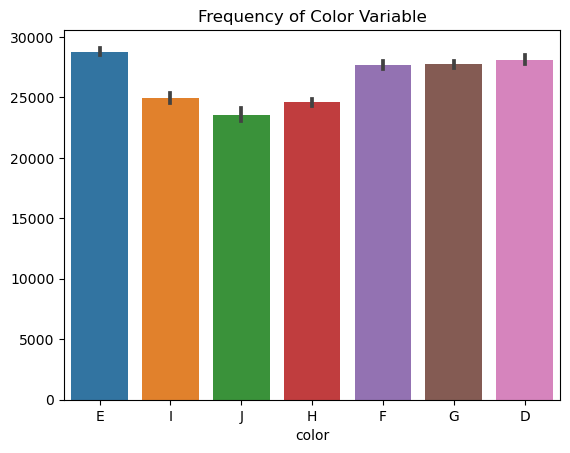

In [41]:
sns.barplot(x = "color", y = data1.color.index ,data = data1).set_title("Frequency of Color Variable");
#w/seaborn

In [42]:
data1["clarity"].value_counts()

clarity
SI1     13055
VS2     12241
SI2      9179
VS1      8162
VVS2     5064
VVS1     3654
IF       1790
I1        737
Name: count, dtype: int64

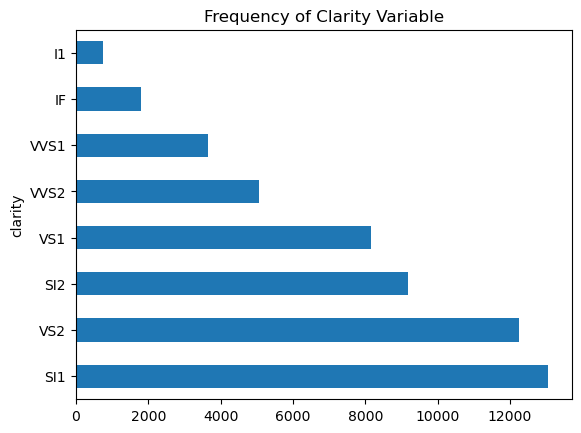

In [43]:
data1["clarity"].value_counts().plot.barh().set_title("Frequency of Clarity Variable");
#w/pandas

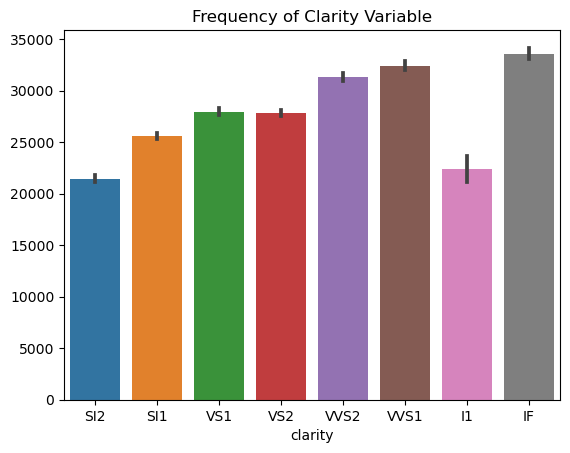

In [44]:
sns.barplot(x = "clarity", y = data1.clarity.index ,data = data1).set_title("Frequency of Clarity Variable");
#w/seaborn

In [45]:
 #Completing ->  we have no null values so we will skip that part

In [46]:
# Creating -> We do not create new variable

In [47]:
# Converting
# label endocoding for categorical varibales

In [48]:
# Firstly get the categorical data in the dataset and make a list.

In [49]:
# get the objects in dataset
my_object = data1.dtypes == object

# get the indexes of object
my_object2 = my_object[my_object].index

# to the list
list_objects = list(my_object2)
list_objects

['cut', 'color', 'clarity']

In [50]:
#my_object[my_object].index

In [51]:
#list(my_object2)

In [52]:
 data_label = data1.copy()

In [53]:
data1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [54]:
label = LabelEncoder() #

for i in list_objects: 
    data_label[i] = label.fit_transform(data_label[i])
    
# dataset['cut'] = label.fit_transform(dataset['cut'])..

In [55]:
data_label.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [56]:
data2 = data_label.copy()

In [57]:
data2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [58]:
data2.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53882.000000,53882.000000,53882.000000,53882.000000,53882.000000,53882.000000,53882.000000,53882.000000,53882.000000,53882.000000
mean,0.797685,2.553747,2.594224,3.835455,61.749614,57.457902,3931.044950,5.731651,5.733497,3.539582
std,0.473743,1.027081,1.701299,1.724707,1.419516,2.221765,3987.218862,1.119255,1.111119,0.691279
min,0.200000,0.000000,0.000000,0.000000,50.800000,51.600000,326.000000,3.730000,3.680000,2.310000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


## Step 4: Perform Exploratory Analysis with Statistics

In [59]:
print("carat:",data1["carat"].dtype)
print("cut:",data1["cut"].dtype)
print("color:",data1["color"].dtype)
print("clarity:",data1["clarity"].dtype)
print("depth:",data1["depth"].dtype)
print("table:",data1["table"].dtype)
print("price:",data1["price"].dtype)
print("x:",data1["x"].dtype)
print("y:",data1["y"].dtype)
print("z:",data1["z"].dtype)

carat: float64
cut: object
color: object
clarity: object
depth: float64
table: float64
price: int64
x: float64
y: float64
z: float64


In [60]:
Target_variable  = ["price"] # get my target/dependent variable

In [61]:
data2_x = ['carat','cut','color','clarity','depth','table','x','y','z']

In [62]:
data2[["cut", Target_variable[0]]]

,cut,price
0,2,326
1,3,326
2,1,327
3,3,334
4,1,335
...,...,...
53935,2,2757
53936,1,2757
53937,4,2757
53938,3,2757


In [63]:
data2[["cut", Target_variable[0]]].groupby("cut", as_index=False).mean()

,cut,price
0,0,4356.511599
1,1,3924.827924
2,2,3456.464810
3,3,4581.389615
4,4,3982.299139


In [64]:
#Corelation between discrete variables and  dependent variable.
# Group by kullnarak discrete değişkenlerin ; bağımlı y değişkeni "price" ile olan ilişkileri ;
# For döngüsü ile bağımısz değişkenimi içeren değişken içinde geziniorum

for x in data2_x: # bütün bağımsız değişkenler burada -> data2_x 
    if data1[x].dtype != 'float64' : 
        print('Survival Correlation by:', x)
        print(data1[[x, Target_variable[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        
# If we use "data1" , we can see the categorical name as "fair","good" etc.
# If we use "data2" , we can see the numerical  as 1,2 etc. becase we applied to label encoding to data2. !

Survival Correlation by: cut
         cut        price
0       Fair  4356.511599
1       Good  3924.827924
2      Ideal  3456.464810
3    Premium  4581.389615
4  Very Good  3982.299139
---------- 

Survival Correlation by: color
  color        price
0     D  3168.928086
1     E  3079.488191
2     F  3724.183487
3     G  3996.905602
4     H  4477.463756
5     I  5090.077164
6     J  5324.012469
---------- 

Survival Correlation by: clarity
  clarity        price
0      I1  3929.804613
1      IF  2864.839106
2     SI1  3992.421295
3     SI2  5059.571304
4     VS1  3839.748714
5     VS2  3925.053672
6    VVS1  2519.512315
7    VVS2  3284.451422
---------- 



In [65]:
data1[data2_x]

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [66]:
data2[data2_x]

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [67]:
#Corelation between categorical variables and  each other

In [68]:
pd.crosstab(data2['cut'],data2['color'])

color,0,1,2,3,4,5,6
cut,,,,,,,
0,163,218,309,311,301,174,119
1,662,933,907,869,700,521,307
2,2834,3900,3824,4882,3114,2091,895
3,1600,2333,2328,2921,2353,1427,808
4,1513,2397,2164,2299,1823,1204,678


In [69]:
# Data Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


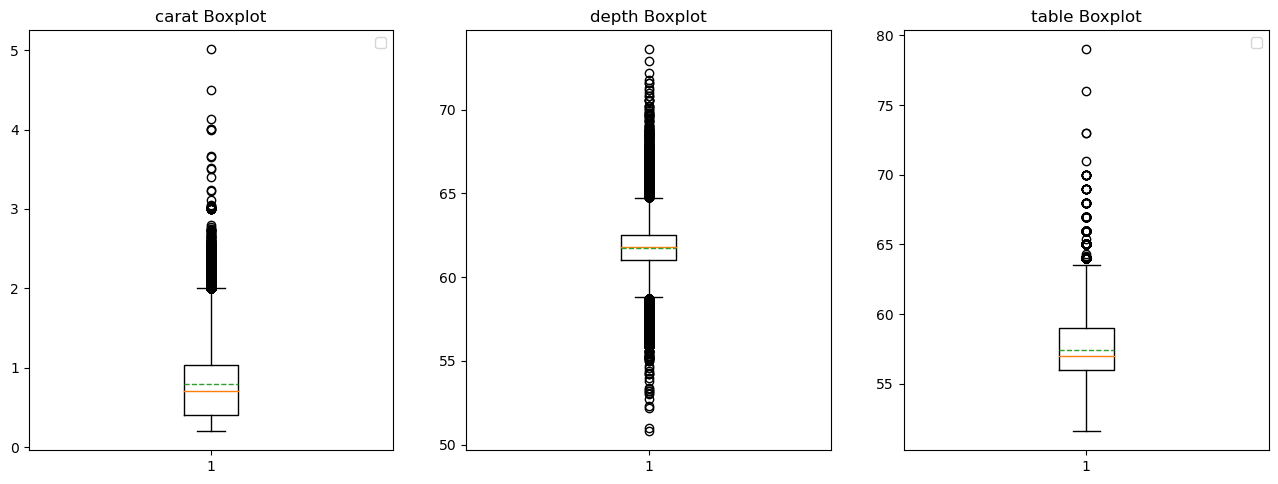

In [70]:
#graph distribution of quantitative data
# Sayısal verilerin grafikleri;

plt.figure(figsize=[16,12]) #aşağıdaki tabloların büyüklüğü ile ilgili ayarlama


# subplot(x,y,z) : Grafiklerin düzlemini ve kaçıncı grafik olduğunu belirtir. 
#İlk sayı satırı, ikinci sayı sütunu, üçüncü sayı ise kaçıncı grafik olduğunu ifade eder
# buradaki subplot aşağıdaki çıktının nasıl görüneceğine karar verir 
        # (231) --> 2 satır olsun 3 sütün olsun ve bu tablo 1. sırada olsun gibi
        # (322) --> 3 satır olsun 2 sütün olsun ve bu tablo 2. sırada olsun gibi


# x ekseninze veri setimizin içinden istediğim bağımsız değişkeni seçiyorum
plt.subplot(231) 
plt.boxplot(x=data2['carat'], showmeans = True, meanline = True)                       
plt.title('carat Boxplot') 
plt.legend();

#depth
plt.subplot(232) #  plt.subplot(2,3,1) ile aynı sonucu verir.
plt.boxplot(x=data2['depth'], showmeans = True, meanline = True)                      
plt.title('depth Boxplot') 


#table
plt.subplot(233) 
plt.boxplot(x=data2['table'], showmeans = True, meanline = True)                       
plt.title('table Boxplot') 
plt.legend();


In [71]:
# evalute the categorical variable with dependent variable

In [72]:
#catplots

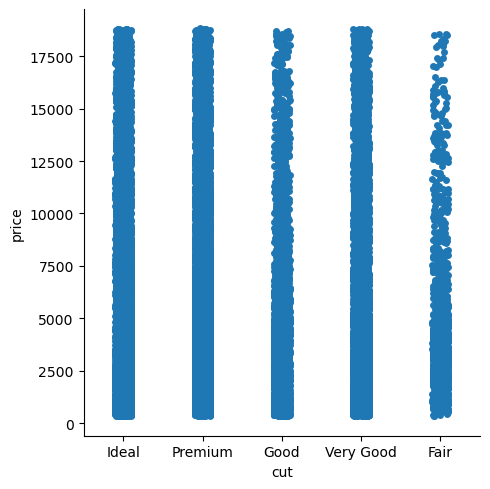

In [73]:
sns.catplot(x = "cut",y = "price",data = data1);

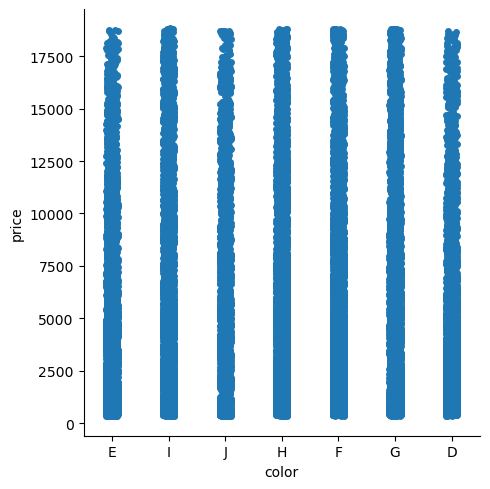

In [74]:
sns.catplot(x = "color",y = "price",data = data1);

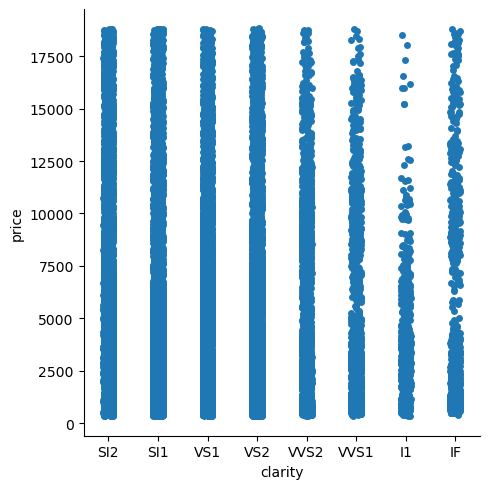

In [75]:
sns.catplot(x = "clarity",y = "price",data = data1);

In [76]:
# violin

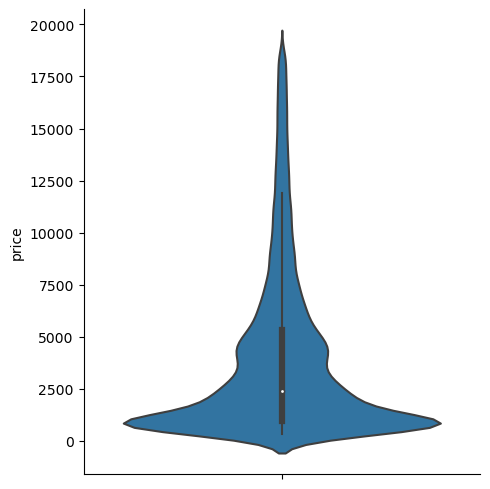

In [77]:
sns.catplot(y = "price", kind ="violin",data = data1);

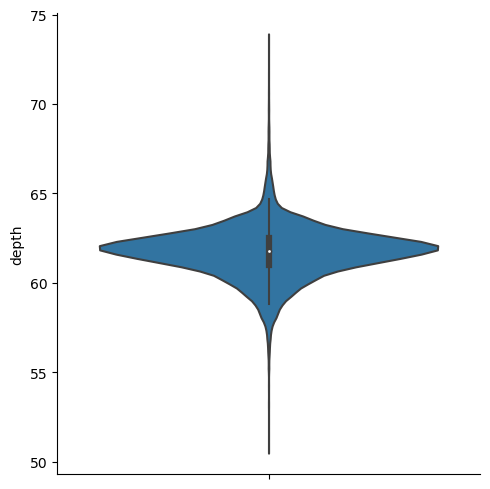

In [78]:
sns.catplot(y = "depth", kind ="violin",data = data1);

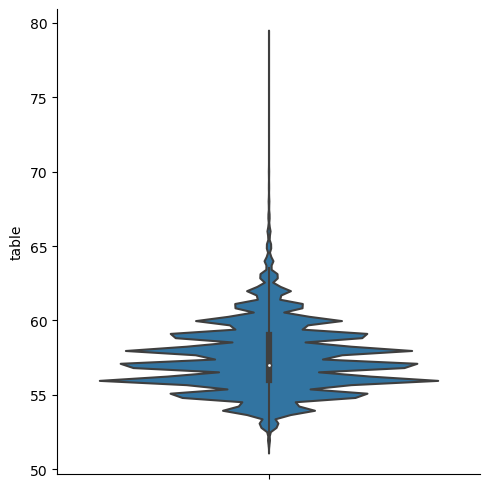

In [79]:
sns.catplot(y = "table", kind ="violin",data = data1);

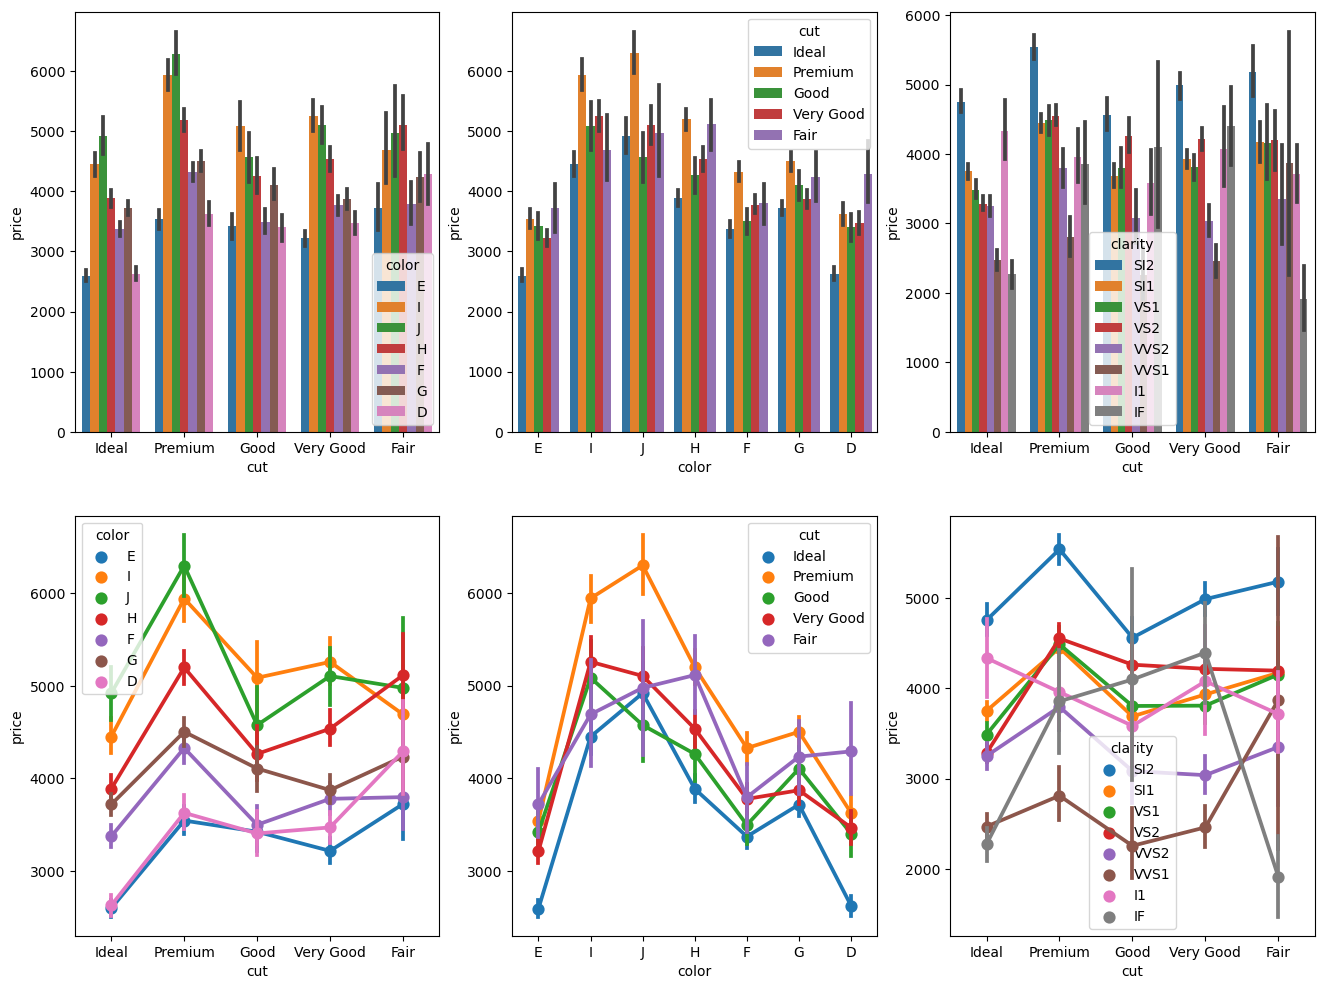

In [80]:
# evaluate dependent variables together with target variable
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

# x ekseninde bağımsız değişkenler
# y ekseninde bağımlı değişkenler
# "data" argümanına barplot çizeceğim verimi koyuyorum
# "ax" argümanına yukarıda tanımladıgım "saxis" değişkenini koydum ve o grafiğin konumunu belirledim
# ax = saxis[0,0] --> x için 0. idex ; y için 0. index


sns.barplot(x = "cut", y ="price", hue = "color",data=data1, ax = saxis[0,0])
sns.barplot(x = "color", y ="price", hue = "cut",data=data1, ax = saxis[0,1])
sns.barplot(x = "cut", y ="price", hue = "clarity",data=data1, ax = saxis[0,2]);

# pointplot çiziyorum

sns.pointplot(x = 'cut', y = 'price',hue = "color",  data=data1, ax = saxis[1,0])
sns.pointplot(x = 'color', y = 'price',hue = "cut"  ,data=data1, ax = saxis[1,1])
sns.pointplot(x = 'cut', y = 'price',hue = "clarity", data=data1, ax = saxis[1,2]);


In [81]:
# density graphs

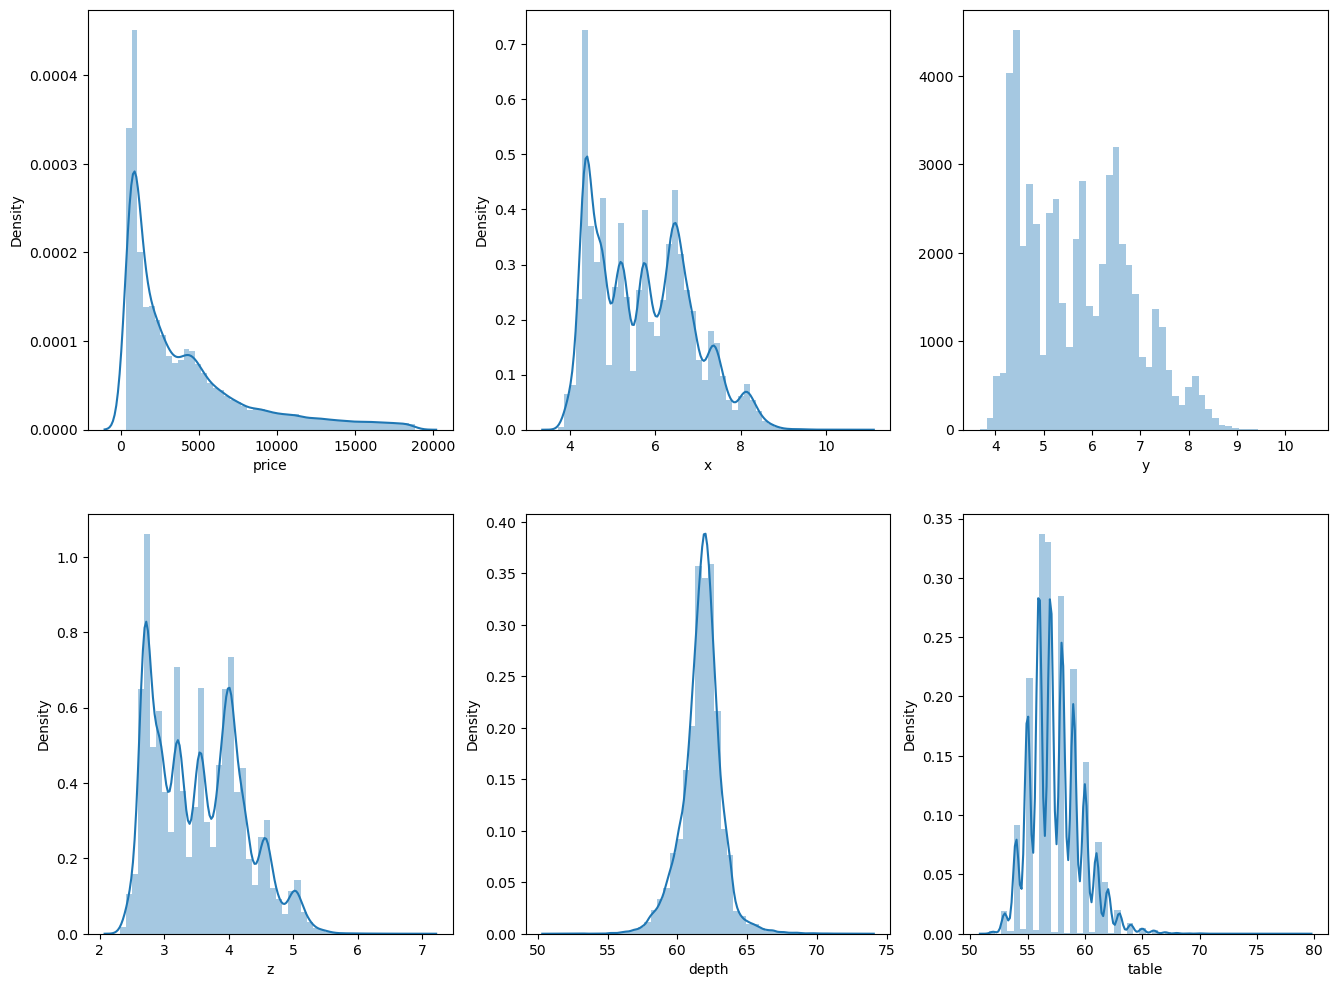

In [82]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.distplot(data1.price, ax = saxis[0,0]);
sns.distplot(data1.x, ax = saxis[0,1]);
sns.distplot(data1.y,kde=False , ax = saxis[0,2]);
sns.distplot(data1.z , ax = saxis[1,0]);
sns.distplot(data1.depth ,  ax = saxis[1,1]);
sns.distplot(data1.table ,  ax = saxis[1,2]);

In [83]:
# Histogram

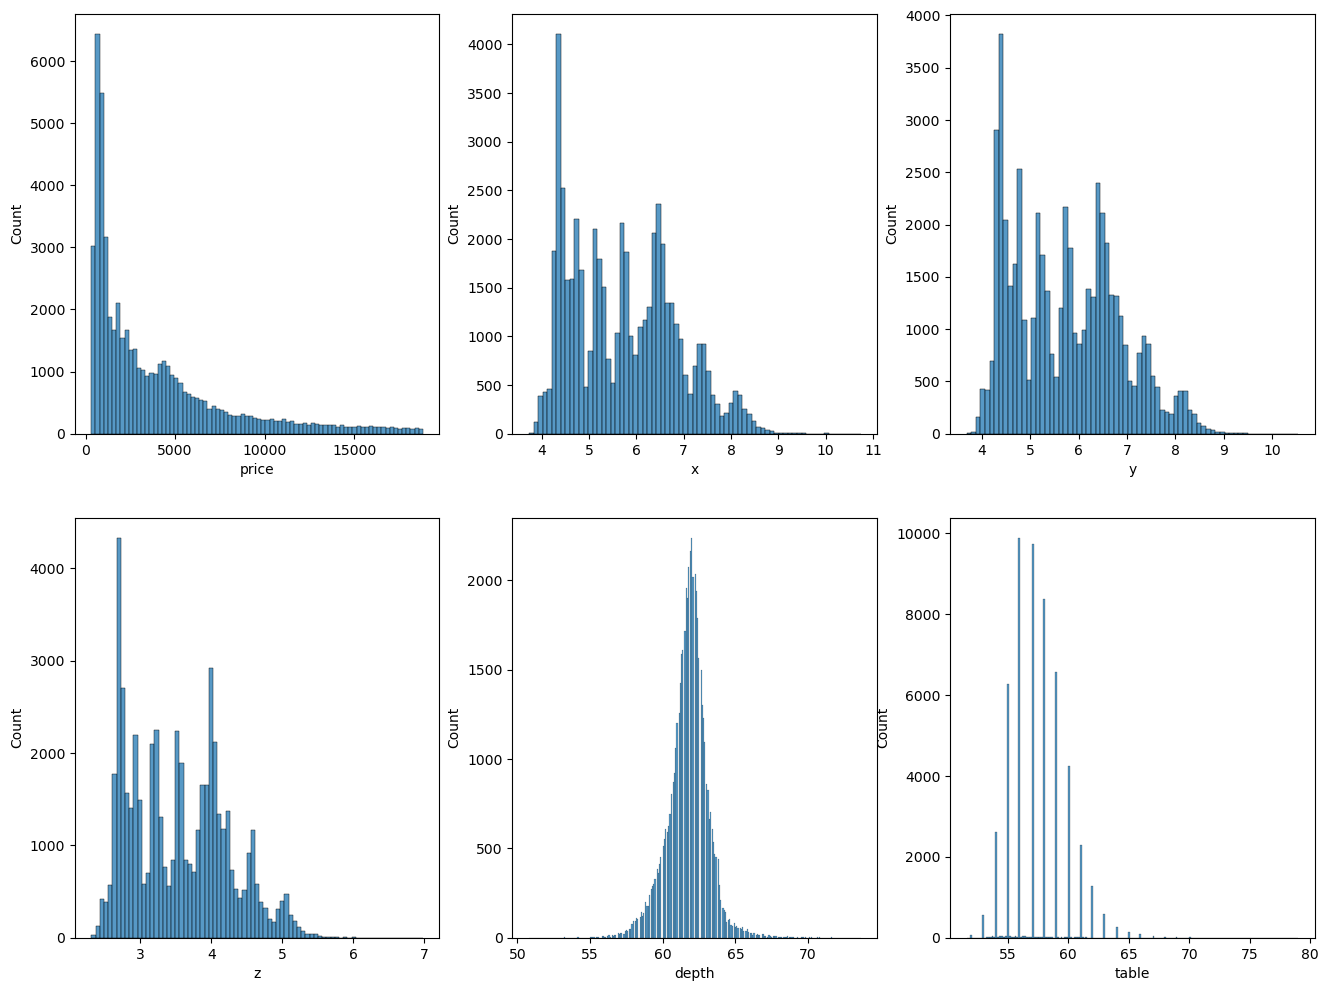

In [84]:
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.histplot(data1.price, ax = saxis[0,0]);
sns.histplot(data1.x, ax = saxis[0,1]);
sns.histplot(data1.y,kde=False , ax = saxis[0,2]);
sns.histplot(data1.z , ax = saxis[1,0]);
sns.histplot(data1.depth ,  ax = saxis[1,1]);
sns.histplot(data1.table ,  ax = saxis[1,2]);

In [85]:
# evaluate dependent variables together with target variable

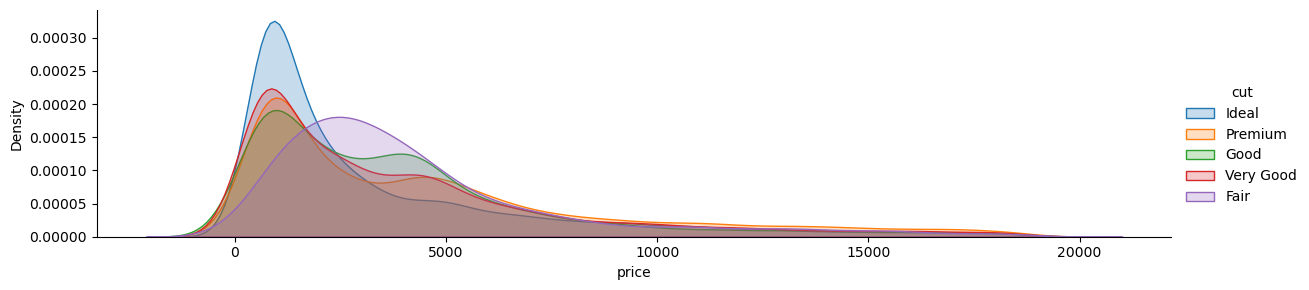

In [86]:
# Bağımlı y "price" değişkenin cut göre dağılımı
# yani hayatta kalan veya hayatta kalmayan yolcuların yaş dağılımlarını
a = sns.FacetGrid( data1, hue = 'cut', aspect=4 )
    # ilk argüman olarak veri setimizi ; bağımlı değişkeni koyarız
    # aspect argümanı grafiğin x ekseninde ne kadar yayılacağını belirliyor..
        #...aralıklar aynı amaa görüntü olarak değiştiriyor
    # Olusturdugumuz grafiğin x ve y eksenini ayarlayabiliriz    

#map fonksiyonu ile ilk olarak fonksiyon koyarsın ve ardından elimizdeki bir datanın elemanlarını koyarız..
#..ve bize bir obje döndürür
#Burada biz seaborn un kdeplot fonksiyonu kullanarak price e göre kdeplot grafiği oluşturucaz            

#...ve ile "map" ile eşleyecez

a.map(sns.kdeplot, 'price', shade= True )
        # shade=True diyerek de her bir grafiğin altındaki alanı boyuyacak
a.add_legend()

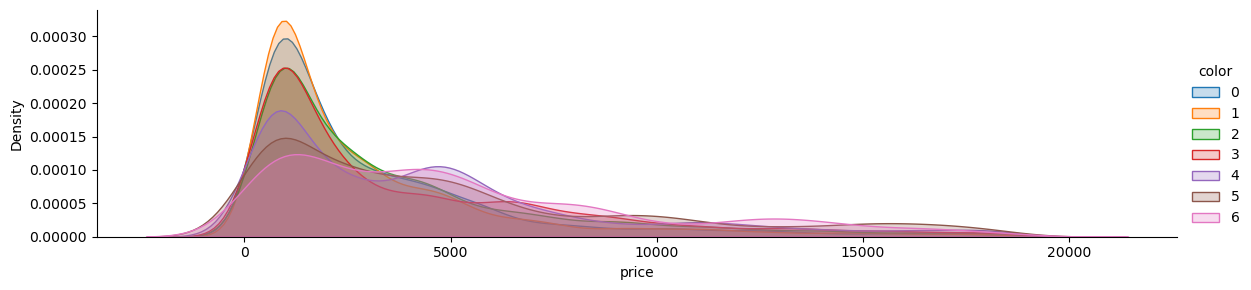

In [87]:
a = sns.FacetGrid( data2, hue = 'color', aspect=4 )
a.map(sns.kdeplot, 'price', shade= True )
a.add_legend()

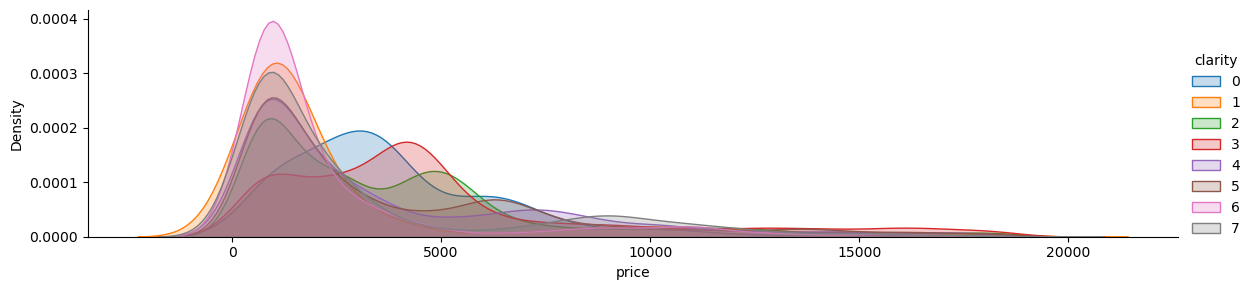

In [88]:
a = sns.FacetGrid( data2, hue = 'clarity', aspect=4 )
a.map(sns.kdeplot, 'price', shade= True )
a.add_legend()

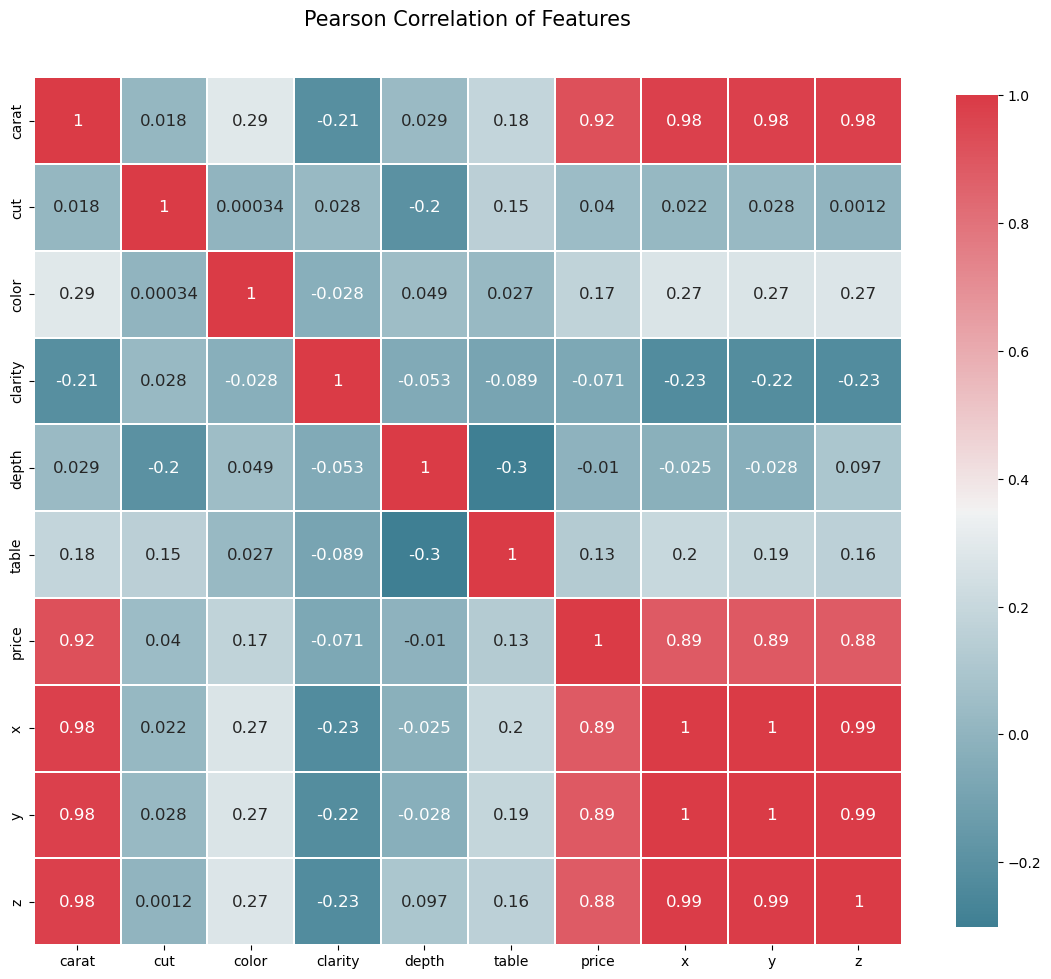

In [93]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        data2.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, #sağ kısımdaki renk scalası
        ax=ax,
        annot=True, #ısı hartiasının her hücresini sayılar ile doldurabilir
        linewidths=0.1,vmax=1.0, linecolor='white', # kutular arasında çizgi çeker
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

# more simple alternative
#correlation matrix
#cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
#corrmat= label_data.corr()
#f, ax = plt.subplots(figsize=(12,12))
#sns.heatmap(corrmat,cmap=cmap,annot=True, )

## STEP 5 : Model Data

In [94]:
data2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [95]:
# Assigning the featurs as X and trarget as y
X= data2.drop(["price"],axis =1)
y= data2["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)
Target = ["price"]

In [103]:
from catboost import CatBoostRegressor

In [118]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr",LinearRegression())])

pipeline_lasso=Pipeline([("scalar2", StandardScaler()),
                      ("lasso",Lasso())])

pipeline_Ridge=Pipeline([("scalar3", StandardScaler()),
                      ("Ridge",Ridge())])

pipeline_Elastic=Pipeline([("scalar4", StandardScaler()),
                      ("ElasticNet",ElasticNet())])

pipeline_PCA=Pipeline([("scalar5", StandardScaler()),
                      ("PCA",PCA())])

pipeline_dt=Pipeline([("scalar6",StandardScaler()),
                     ("dt",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar7",StandardScaler()),
                     ("rf",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar8",StandardScaler()),
                     ("kn",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar9",StandardScaler()),
                     ("xgb",XGBRegressor())])

pipeline_Lightgbm =Pipeline([("scalar10",StandardScaler()),
                     ("Lightgbm",LGBMRegressor())])
pipeline_cat=Pipeline([("scalar11",StandardScaler()),
                     ("catboost",CatBoostRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso ,pipeline_Ridge ,pipeline_Elastic ,pipeline_PCA , pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb,pipeline_Lightgbm,pipeline_cat]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "Lasso", 2: "Ridge",3: "ElasticNet", 4: "PCA",5: "DecisionTree",6: "RandomForest",7: "KNeighbors",8: "XGBoost", 9 :"Lightgbm",10:"catboost"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 37717, number of used features: 9
[LightGBM] [Info] Start training from score 3960.709150
Learning rate set to 0.072656
0:	learn: 3762.1272722	total: 15.1ms	remaining: 15.1s
1:	learn: 3525.9731082	total: 25.1ms	remaining: 12.5s
2:	learn: 3306.8671915	total: 36.4ms	remaining: 12.1s
3:	learn: 3111.9981305	total: 47.7ms	remaining: 11.9s
4:	learn: 2921.1256304	total: 61.9ms	remaining: 12.3s
5:	learn: 2749.4837348	total: 75.2ms	remaining: 12.5s
6:	learn: 2590.7228177	total: 90.3ms	remaining: 12.8s
7:	learn: 2446.9760303	total: 104ms	remaining: 12.9s
8:	learn: 2311.4584024	total: 115ms	remaining: 12.6s
9:	learn: 2188.2189603	total: 129ms	remaining: 12.7s
10:	learn: 2073.8276100	total: 140ms	remaining: 12.6s
11:	learn: 1970.6714147	total: 152m

156:	learn: 562.9839778	total: 1.89s	remaining: 10.1s
157:	learn: 562.1814897	total: 1.9s	remaining: 10.1s
158:	learn: 561.5880005	total: 1.91s	remaining: 10.1s
159:	learn: 560.9688842	total: 1.92s	remaining: 10.1s
160:	learn: 560.4908857	total: 1.93s	remaining: 10.1s
161:	learn: 559.8098955	total: 1.94s	remaining: 10.1s
162:	learn: 559.3147810	total: 1.96s	remaining: 10s
163:	learn: 559.0747431	total: 1.97s	remaining: 10s
164:	learn: 558.5909512	total: 1.98s	remaining: 10s
165:	learn: 558.3842280	total: 1.99s	remaining: 9.98s
166:	learn: 557.8858845	total: 2s	remaining: 9.97s
167:	learn: 557.4194113	total: 2.01s	remaining: 9.96s
168:	learn: 557.0094328	total: 2.02s	remaining: 9.93s
169:	learn: 556.6249585	total: 2.03s	remaining: 9.9s
170:	learn: 555.9684636	total: 2.04s	remaining: 9.87s
171:	learn: 555.6635925	total: 2.05s	remaining: 9.86s
172:	learn: 555.2436131	total: 2.06s	remaining: 9.85s
173:	learn: 554.8110396	total: 2.07s	remaining: 9.84s
174:	learn: 554.2921761	total: 2.08s	re

320:	learn: 510.3320130	total: 3.8s	remaining: 8.05s
321:	learn: 510.1240179	total: 3.87s	remaining: 8.14s
322:	learn: 509.9150310	total: 3.92s	remaining: 8.22s
323:	learn: 509.8342903	total: 3.95s	remaining: 8.24s
324:	learn: 509.6563982	total: 3.96s	remaining: 8.22s
325:	learn: 509.3213952	total: 3.97s	remaining: 8.21s
326:	learn: 509.1993520	total: 3.99s	remaining: 8.21s
327:	learn: 508.8807731	total: 4.01s	remaining: 8.21s
328:	learn: 508.8280591	total: 4.02s	remaining: 8.21s
329:	learn: 508.7525440	total: 4.04s	remaining: 8.2s
330:	learn: 508.6781030	total: 4.06s	remaining: 8.2s
331:	learn: 508.5532797	total: 4.07s	remaining: 8.18s
332:	learn: 508.5028961	total: 4.08s	remaining: 8.17s
333:	learn: 508.3051020	total: 4.09s	remaining: 8.16s
334:	learn: 508.1160535	total: 4.1s	remaining: 8.14s
335:	learn: 507.8572798	total: 4.11s	remaining: 8.13s
336:	learn: 507.6735318	total: 4.12s	remaining: 8.11s
337:	learn: 507.4781183	total: 4.13s	remaining: 8.09s
338:	learn: 507.2544061	total: 4

490:	learn: 482.7502055	total: 5.71s	remaining: 5.92s
491:	learn: 482.7072757	total: 5.72s	remaining: 5.91s
492:	learn: 482.5897967	total: 5.73s	remaining: 5.89s
493:	learn: 482.4730765	total: 5.74s	remaining: 5.88s
494:	learn: 482.3889244	total: 5.74s	remaining: 5.86s
495:	learn: 482.3146387	total: 5.75s	remaining: 5.84s
496:	learn: 482.2851002	total: 5.76s	remaining: 5.83s
497:	learn: 482.1184084	total: 5.77s	remaining: 5.82s
498:	learn: 481.9581113	total: 5.78s	remaining: 5.8s
499:	learn: 481.8616596	total: 5.79s	remaining: 5.79s
500:	learn: 481.7629718	total: 5.8s	remaining: 5.78s
501:	learn: 481.6952008	total: 5.81s	remaining: 5.76s
502:	learn: 481.5665860	total: 5.82s	remaining: 5.75s
503:	learn: 481.4619597	total: 5.84s	remaining: 5.74s
504:	learn: 481.1964041	total: 5.85s	remaining: 5.73s
505:	learn: 481.0472977	total: 5.86s	remaining: 5.72s
506:	learn: 480.8615227	total: 5.87s	remaining: 5.71s
507:	learn: 480.5683371	total: 5.88s	remaining: 5.7s
508:	learn: 480.2976194	total: 

659:	learn: 462.6328401	total: 7.41s	remaining: 3.82s
660:	learn: 462.6152098	total: 7.42s	remaining: 3.8s
661:	learn: 462.5258498	total: 7.43s	remaining: 3.79s
662:	learn: 462.5189631	total: 7.43s	remaining: 3.78s
663:	learn: 462.5016855	total: 7.44s	remaining: 3.77s
664:	learn: 462.2749482	total: 7.45s	remaining: 3.75s
665:	learn: 462.0376985	total: 7.46s	remaining: 3.74s
666:	learn: 461.9415728	total: 7.47s	remaining: 3.73s
667:	learn: 461.9070347	total: 7.48s	remaining: 3.72s
668:	learn: 461.8109891	total: 7.49s	remaining: 3.71s
669:	learn: 461.7168177	total: 7.5s	remaining: 3.7s
670:	learn: 461.6292465	total: 7.52s	remaining: 3.69s
671:	learn: 461.5640397	total: 7.53s	remaining: 3.68s
672:	learn: 461.5405298	total: 7.54s	remaining: 3.67s
673:	learn: 461.3422594	total: 7.56s	remaining: 3.65s
674:	learn: 461.2601983	total: 7.57s	remaining: 3.64s
675:	learn: 461.1536590	total: 7.58s	remaining: 3.63s
676:	learn: 461.0449881	total: 7.59s	remaining: 3.62s
677:	learn: 460.9461238	total: 

816:	learn: 447.7547462	total: 9.33s	remaining: 2.09s
817:	learn: 447.7021232	total: 9.34s	remaining: 2.08s
818:	learn: 447.5578008	total: 9.35s	remaining: 2.07s
819:	learn: 447.4439245	total: 9.36s	remaining: 2.05s
820:	learn: 447.3702087	total: 9.37s	remaining: 2.04s
821:	learn: 447.2566412	total: 9.38s	remaining: 2.03s
822:	learn: 447.1244813	total: 9.38s	remaining: 2.02s
823:	learn: 447.1002601	total: 9.39s	remaining: 2.01s
824:	learn: 447.0076421	total: 9.4s	remaining: 2s
825:	learn: 446.8928911	total: 9.41s	remaining: 1.98s
826:	learn: 446.8384146	total: 9.43s	remaining: 1.97s
827:	learn: 446.7958377	total: 9.44s	remaining: 1.96s
828:	learn: 446.7501610	total: 9.45s	remaining: 1.95s
829:	learn: 446.6155938	total: 9.46s	remaining: 1.94s
830:	learn: 446.5392293	total: 9.47s	remaining: 1.93s
831:	learn: 446.4385136	total: 9.48s	remaining: 1.92s
832:	learn: 446.2907942	total: 9.5s	remaining: 1.9s
833:	learn: 446.1986019	total: 9.51s	remaining: 1.89s
834:	learn: 446.1747468	total: 9.5

979:	learn: 434.7012403	total: 11.2s	remaining: 229ms
980:	learn: 434.6348704	total: 11.2s	remaining: 218ms
981:	learn: 434.6104035	total: 11.2s	remaining: 206ms
982:	learn: 434.5267532	total: 11.2s	remaining: 195ms
983:	learn: 434.4791827	total: 11.3s	remaining: 183ms
984:	learn: 434.3617539	total: 11.3s	remaining: 172ms
985:	learn: 434.3381949	total: 11.3s	remaining: 160ms
986:	learn: 434.3163673	total: 11.3s	remaining: 149ms
987:	learn: 434.2325225	total: 11.3s	remaining: 137ms
988:	learn: 434.1194987	total: 11.3s	remaining: 126ms
989:	learn: 434.0070115	total: 11.3s	remaining: 114ms
990:	learn: 433.8684616	total: 11.3s	remaining: 103ms
991:	learn: 433.8552231	total: 11.3s	remaining: 91.4ms
992:	learn: 433.6999426	total: 11.3s	remaining: 80ms
993:	learn: 433.5639056	total: 11.4s	remaining: 68.5ms
994:	learn: 433.4813703	total: 11.4s	remaining: 57.1ms
995:	learn: 433.4686380	total: 11.4s	remaining: 45.7ms
996:	learn: 433.3646812	total: 11.4s	remaining: 34.3ms
997:	learn: 433.3131271	

In [ ]:
#model.__class__.__name__
#output: 'Pipeline'

In [105]:
MLA_columns = ['MLA Name','neg_root_mean_squared_error']

MLA_compare = pd.DataFrame(columns = MLA_columns)

cv_results_rms = []
for i, model in enumerate(pipelines):
        # enumarate -->  (0,Pipeline(steps=[('scalar1', StandardScaler()),('lr', LinearRegression())]))
    cv_score = -cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    MLA_compare.loc[i, 'MLA Name'] = pipe_dict[i]
    MLA_compare.loc[i, 'neg_root_mean_squared_error'] = cv_score.mean()
   
    
MLA_compare    

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1274
[LightGBM] [Info] Number of data points in the train set: 38794, number of used features: 9
[LightGBM] [Info] Start training from score 3925.595376
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1273
[LightGBM] [Info] Number of data points in the train set: 38794, number of used features: 9
[LightGBM] [Info] Start training from score 3925.398180
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1270
[LightGBM] [Info] Number of data points in the train set: 38794, number of used features: 9
[LightGBM] [Info] Start 

99:	learn: 603.1692060	total: 1.47s	remaining: 13.3s
100:	learn: 601.6699753	total: 1.49s	remaining: 13.2s
101:	learn: 599.5476166	total: 1.5s	remaining: 13.2s
102:	learn: 598.1714388	total: 1.51s	remaining: 13.2s
103:	learn: 596.5701666	total: 1.52s	remaining: 13.1s
104:	learn: 595.6886968	total: 1.54s	remaining: 13.1s
105:	learn: 593.5118956	total: 1.55s	remaining: 13.1s
106:	learn: 592.4092588	total: 1.56s	remaining: 13.1s
107:	learn: 591.7475652	total: 1.58s	remaining: 13s
108:	learn: 589.9362865	total: 1.59s	remaining: 13s
109:	learn: 589.2868519	total: 1.61s	remaining: 13s
110:	learn: 588.7267635	total: 1.62s	remaining: 13s
111:	learn: 587.7387415	total: 1.63s	remaining: 12.9s
112:	learn: 586.4811313	total: 1.65s	remaining: 12.9s
113:	learn: 585.9498016	total: 1.66s	remaining: 12.9s
114:	learn: 584.6700245	total: 1.67s	remaining: 12.9s
115:	learn: 583.1331948	total: 1.69s	remaining: 12.9s
116:	learn: 581.7690667	total: 1.7s	remaining: 12.9s
117:	learn: 580.4394937	total: 1.72s	re

260:	learn: 518.0446178	total: 3.83s	remaining: 10.9s
261:	learn: 517.8932919	total: 3.85s	remaining: 10.8s
262:	learn: 517.4559178	total: 3.86s	remaining: 10.8s
263:	learn: 517.1246522	total: 3.87s	remaining: 10.8s
264:	learn: 516.9478436	total: 3.89s	remaining: 10.8s
265:	learn: 516.5874747	total: 3.9s	remaining: 10.8s
266:	learn: 516.3703138	total: 3.91s	remaining: 10.7s
267:	learn: 516.1571062	total: 3.92s	remaining: 10.7s
268:	learn: 516.0182604	total: 3.93s	remaining: 10.7s
269:	learn: 515.7380582	total: 3.95s	remaining: 10.7s
270:	learn: 515.7319648	total: 3.96s	remaining: 10.6s
271:	learn: 515.3002731	total: 3.97s	remaining: 10.6s
272:	learn: 514.8317164	total: 3.98s	remaining: 10.6s
273:	learn: 514.5489244	total: 4s	remaining: 10.6s
274:	learn: 514.2900923	total: 4.01s	remaining: 10.6s
275:	learn: 514.0353550	total: 4.02s	remaining: 10.6s
276:	learn: 513.7070894	total: 4.04s	remaining: 10.5s
277:	learn: 513.4263404	total: 4.05s	remaining: 10.5s
278:	learn: 513.2392145	total: 4

413:	learn: 487.4101029	total: 5.72s	remaining: 8.1s
414:	learn: 487.1916776	total: 5.73s	remaining: 8.08s
415:	learn: 487.0087204	total: 5.75s	remaining: 8.06s
416:	learn: 486.8208713	total: 5.75s	remaining: 8.04s
417:	learn: 486.5305291	total: 5.77s	remaining: 8.03s
418:	learn: 486.4034610	total: 5.78s	remaining: 8.02s
419:	learn: 486.2496363	total: 5.79s	remaining: 8s
420:	learn: 486.1637784	total: 5.8s	remaining: 7.98s
421:	learn: 486.0692127	total: 5.81s	remaining: 7.96s
422:	learn: 485.8827424	total: 5.82s	remaining: 7.94s
423:	learn: 485.7585055	total: 5.83s	remaining: 7.93s
424:	learn: 485.5619110	total: 5.85s	remaining: 7.91s
425:	learn: 485.4029023	total: 5.86s	remaining: 7.89s
426:	learn: 485.1993904	total: 5.87s	remaining: 7.87s
427:	learn: 485.0179408	total: 5.88s	remaining: 7.86s
428:	learn: 484.8534597	total: 5.89s	remaining: 7.84s
429:	learn: 484.6659637	total: 5.9s	remaining: 7.82s
430:	learn: 484.4929974	total: 5.91s	remaining: 7.8s
431:	learn: 484.3371188	total: 5.92

583:	learn: 465.6665411	total: 7.64s	remaining: 5.44s
584:	learn: 465.5125377	total: 7.65s	remaining: 5.43s
585:	learn: 465.3738412	total: 7.67s	remaining: 5.42s
586:	learn: 465.2786999	total: 7.68s	remaining: 5.4s
587:	learn: 465.1620617	total: 7.69s	remaining: 5.39s
588:	learn: 465.0324122	total: 7.7s	remaining: 5.37s
589:	learn: 464.8683179	total: 7.71s	remaining: 5.36s
590:	learn: 464.7037068	total: 7.72s	remaining: 5.34s
591:	learn: 464.6311778	total: 7.73s	remaining: 5.33s
592:	learn: 464.5167709	total: 7.74s	remaining: 5.31s
593:	learn: 464.4031337	total: 7.75s	remaining: 5.3s
594:	learn: 464.3829866	total: 7.76s	remaining: 5.28s
595:	learn: 464.2645645	total: 7.77s	remaining: 5.27s
596:	learn: 464.0299996	total: 7.78s	remaining: 5.25s
597:	learn: 463.9358269	total: 7.79s	remaining: 5.24s
598:	learn: 463.7886301	total: 7.8s	remaining: 5.22s
599:	learn: 463.6723106	total: 7.81s	remaining: 5.21s
600:	learn: 463.5090958	total: 7.82s	remaining: 5.19s
601:	learn: 463.4737162	total: 7

742:	learn: 450.0170177	total: 9.95s	remaining: 3.44s
743:	learn: 449.9755407	total: 9.96s	remaining: 3.42s
744:	learn: 449.8673678	total: 9.97s	remaining: 3.41s
745:	learn: 449.7743773	total: 9.98s	remaining: 3.4s
746:	learn: 449.6328806	total: 9.99s	remaining: 3.38s
747:	learn: 449.5948503	total: 10s	remaining: 3.37s
748:	learn: 449.5581732	total: 10s	remaining: 3.35s
749:	learn: 449.5378590	total: 10s	remaining: 3.34s
750:	learn: 449.5062389	total: 10s	remaining: 3.33s
751:	learn: 449.3824617	total: 10s	remaining: 3.31s
752:	learn: 449.2874916	total: 10.1s	remaining: 3.3s
753:	learn: 449.2691572	total: 10.1s	remaining: 3.28s
754:	learn: 449.1435450	total: 10.1s	remaining: 3.27s
755:	learn: 449.0077064	total: 10.1s	remaining: 3.25s
756:	learn: 448.9457039	total: 10.1s	remaining: 3.24s
757:	learn: 448.8850707	total: 10.1s	remaining: 3.23s
758:	learn: 448.7670597	total: 10.1s	remaining: 3.21s
759:	learn: 448.7445328	total: 10.1s	remaining: 3.2s
760:	learn: 448.6509933	total: 10.1s	rema

902:	learn: 438.0228938	total: 12.1s	remaining: 1.3s
903:	learn: 437.9420995	total: 12.1s	remaining: 1.29s
904:	learn: 437.8837780	total: 12.1s	remaining: 1.27s
905:	learn: 437.7839441	total: 12.1s	remaining: 1.26s
906:	learn: 437.6806213	total: 12.2s	remaining: 1.25s
907:	learn: 437.6398833	total: 12.2s	remaining: 1.23s
908:	learn: 437.5626299	total: 12.2s	remaining: 1.22s
909:	learn: 437.4996745	total: 12.2s	remaining: 1.21s
910:	learn: 437.4163710	total: 12.2s	remaining: 1.19s
911:	learn: 437.3234768	total: 12.2s	remaining: 1.18s
912:	learn: 437.3108000	total: 12.2s	remaining: 1.16s
913:	learn: 437.1399712	total: 12.2s	remaining: 1.15s
914:	learn: 437.0005835	total: 12.2s	remaining: 1.14s
915:	learn: 436.8514533	total: 12.3s	remaining: 1.12s
916:	learn: 436.7606285	total: 12.3s	remaining: 1.11s
917:	learn: 436.6085914	total: 12.3s	remaining: 1.1s
918:	learn: 436.5597520	total: 12.3s	remaining: 1.08s
919:	learn: 436.4576936	total: 12.3s	remaining: 1.07s
920:	learn: 436.3518207	total:

61:	learn: 675.1235134	total: 696ms	remaining: 10.5s
62:	learn: 671.4607674	total: 714ms	remaining: 10.6s
63:	learn: 668.8101438	total: 731ms	remaining: 10.7s
64:	learn: 666.3411584	total: 754ms	remaining: 10.8s
65:	learn: 663.3543111	total: 779ms	remaining: 11s
66:	learn: 659.7918920	total: 797ms	remaining: 11.1s
67:	learn: 656.9273589	total: 817ms	remaining: 11.2s
68:	learn: 653.2060976	total: 833ms	remaining: 11.2s
69:	learn: 650.6532147	total: 852ms	remaining: 11.3s
70:	learn: 648.8053883	total: 868ms	remaining: 11.4s
71:	learn: 646.1387947	total: 888ms	remaining: 11.4s
72:	learn: 644.4312955	total: 905ms	remaining: 11.5s
73:	learn: 642.5221045	total: 922ms	remaining: 11.5s
74:	learn: 639.9128150	total: 938ms	remaining: 11.6s
75:	learn: 637.1917821	total: 953ms	remaining: 11.6s
76:	learn: 635.7015105	total: 970ms	remaining: 11.6s
77:	learn: 634.5941454	total: 985ms	remaining: 11.6s
78:	learn: 633.0067615	total: 1s	remaining: 11.7s
79:	learn: 631.5646441	total: 1.01s	remaining: 11.7

224:	learn: 524.9905172	total: 2.79s	remaining: 9.62s
225:	learn: 524.8888946	total: 2.8s	remaining: 9.6s
226:	learn: 524.7289571	total: 2.81s	remaining: 9.59s
227:	learn: 524.5075993	total: 2.82s	remaining: 9.56s
228:	learn: 524.2826193	total: 2.83s	remaining: 9.54s
229:	learn: 524.1624453	total: 2.85s	remaining: 9.53s
230:	learn: 523.7555965	total: 2.86s	remaining: 9.51s
231:	learn: 523.5943749	total: 2.87s	remaining: 9.49s
232:	learn: 523.3617963	total: 2.88s	remaining: 9.47s
233:	learn: 523.0522915	total: 2.89s	remaining: 9.45s
234:	learn: 522.7969096	total: 2.9s	remaining: 9.43s
235:	learn: 522.5425709	total: 2.91s	remaining: 9.41s
236:	learn: 522.3537758	total: 2.92s	remaining: 9.39s
237:	learn: 522.0551586	total: 2.93s	remaining: 9.37s
238:	learn: 521.5904174	total: 2.94s	remaining: 9.35s
239:	learn: 521.2409024	total: 2.95s	remaining: 9.34s
240:	learn: 520.8077721	total: 2.96s	remaining: 9.32s
241:	learn: 520.4756583	total: 2.97s	remaining: 9.3s
242:	learn: 520.2730001	total: 2

386:	learn: 488.7796153	total: 4.65s	remaining: 7.37s
387:	learn: 488.6337898	total: 4.66s	remaining: 7.36s
388:	learn: 488.5559887	total: 4.67s	remaining: 7.34s
389:	learn: 488.4558489	total: 4.68s	remaining: 7.33s
390:	learn: 488.4186871	total: 4.7s	remaining: 7.31s
391:	learn: 488.3710762	total: 4.71s	remaining: 7.3s
392:	learn: 488.2683553	total: 4.71s	remaining: 7.28s
393:	learn: 488.1339468	total: 4.73s	remaining: 7.27s
394:	learn: 487.8817534	total: 4.74s	remaining: 7.25s
395:	learn: 487.7914697	total: 4.75s	remaining: 7.24s
396:	learn: 487.6077296	total: 4.76s	remaining: 7.22s
397:	learn: 487.4635522	total: 4.76s	remaining: 7.21s
398:	learn: 487.3451892	total: 4.78s	remaining: 7.2s
399:	learn: 487.1688195	total: 4.79s	remaining: 7.18s
400:	learn: 486.9499856	total: 4.8s	remaining: 7.17s
401:	learn: 486.8422642	total: 4.81s	remaining: 7.15s
402:	learn: 486.7124295	total: 4.82s	remaining: 7.14s
403:	learn: 486.6141969	total: 4.83s	remaining: 7.12s
404:	learn: 486.4046883	total: 4

541:	learn: 468.4144530	total: 6.31s	remaining: 5.33s
542:	learn: 468.3498074	total: 6.32s	remaining: 5.32s
543:	learn: 468.2045166	total: 6.33s	remaining: 5.31s
544:	learn: 468.1733839	total: 6.34s	remaining: 5.3s
545:	learn: 467.9303793	total: 6.36s	remaining: 5.28s
546:	learn: 467.8327162	total: 6.37s	remaining: 5.27s
547:	learn: 467.6470815	total: 6.38s	remaining: 5.26s
548:	learn: 467.4971724	total: 6.39s	remaining: 5.25s
549:	learn: 467.4186342	total: 6.4s	remaining: 5.23s
550:	learn: 467.2383096	total: 6.41s	remaining: 5.22s
551:	learn: 467.1234600	total: 6.42s	remaining: 5.21s
552:	learn: 467.0282136	total: 6.43s	remaining: 5.2s
553:	learn: 467.0020396	total: 6.44s	remaining: 5.18s
554:	learn: 466.9857814	total: 6.45s	remaining: 5.17s
555:	learn: 466.8959485	total: 6.46s	remaining: 5.16s
556:	learn: 466.8037714	total: 6.47s	remaining: 5.14s
557:	learn: 466.6145568	total: 6.48s	remaining: 5.13s
558:	learn: 466.4662648	total: 6.49s	remaining: 5.12s
559:	learn: 466.3172616	total: 

705:	learn: 452.8333058	total: 8.47s	remaining: 3.53s
706:	learn: 452.6648111	total: 8.48s	remaining: 3.52s
707:	learn: 452.6216006	total: 8.5s	remaining: 3.5s
708:	learn: 452.5005578	total: 8.51s	remaining: 3.49s
709:	learn: 452.4364400	total: 8.52s	remaining: 3.48s
710:	learn: 452.3444169	total: 8.53s	remaining: 3.47s
711:	learn: 452.2880123	total: 8.54s	remaining: 3.46s
712:	learn: 452.0969808	total: 8.55s	remaining: 3.44s
713:	learn: 452.0605987	total: 8.56s	remaining: 3.43s
714:	learn: 451.9744706	total: 8.57s	remaining: 3.42s
715:	learn: 451.8261306	total: 8.58s	remaining: 3.4s
716:	learn: 451.7323307	total: 8.59s	remaining: 3.39s
717:	learn: 451.6715398	total: 8.61s	remaining: 3.38s
718:	learn: 451.6193316	total: 8.62s	remaining: 3.37s
719:	learn: 451.5326770	total: 8.63s	remaining: 3.35s
720:	learn: 451.3917684	total: 8.64s	remaining: 3.34s
721:	learn: 451.3743180	total: 8.65s	remaining: 3.33s
722:	learn: 451.3280553	total: 8.66s	remaining: 3.32s
723:	learn: 451.1698707	total: 

860:	learn: 439.8499549	total: 10.4s	remaining: 1.68s
861:	learn: 439.8086045	total: 10.4s	remaining: 1.66s
862:	learn: 439.7321972	total: 10.4s	remaining: 1.65s
863:	learn: 439.6623642	total: 10.4s	remaining: 1.64s
864:	learn: 439.5866130	total: 10.4s	remaining: 1.63s
865:	learn: 439.4910297	total: 10.4s	remaining: 1.61s
866:	learn: 439.4023288	total: 10.5s	remaining: 1.6s
867:	learn: 439.2587907	total: 10.5s	remaining: 1.59s
868:	learn: 439.1238639	total: 10.5s	remaining: 1.58s
869:	learn: 439.0799152	total: 10.5s	remaining: 1.57s
870:	learn: 439.0591032	total: 10.5s	remaining: 1.56s
871:	learn: 438.9211204	total: 10.5s	remaining: 1.54s
872:	learn: 438.8255593	total: 10.6s	remaining: 1.53s
873:	learn: 438.7197504	total: 10.6s	remaining: 1.52s
874:	learn: 438.6535052	total: 10.6s	remaining: 1.51s
875:	learn: 438.6119092	total: 10.6s	remaining: 1.5s
876:	learn: 438.5412077	total: 10.6s	remaining: 1.49s
877:	learn: 438.4234389	total: 10.7s	remaining: 1.48s
878:	learn: 438.2952531	total:

16:	learn: 1522.2090152	total: 202ms	remaining: 11.7s
17:	learn: 1457.2172821	total: 214ms	remaining: 11.7s
18:	learn: 1399.8241299	total: 228ms	remaining: 11.7s
19:	learn: 1346.7149905	total: 239ms	remaining: 11.7s
20:	learn: 1296.7720252	total: 254ms	remaining: 11.8s
21:	learn: 1250.3875375	total: 270ms	remaining: 12s
22:	learn: 1206.6363407	total: 285ms	remaining: 12.1s
23:	learn: 1169.0195905	total: 299ms	remaining: 12.2s
24:	learn: 1133.7753905	total: 316ms	remaining: 12.3s
25:	learn: 1099.0593088	total: 331ms	remaining: 12.4s
26:	learn: 1066.7764462	total: 345ms	remaining: 12.4s
27:	learn: 1041.0907093	total: 354ms	remaining: 12.3s
28:	learn: 1014.2951903	total: 368ms	remaining: 12.3s
29:	learn: 989.6351648	total: 384ms	remaining: 12.4s
30:	learn: 963.4032196	total: 398ms	remaining: 12.4s
31:	learn: 941.8163664	total: 413ms	remaining: 12.5s
32:	learn: 921.1812202	total: 425ms	remaining: 12.4s
33:	learn: 903.5221474	total: 436ms	remaining: 12.4s
34:	learn: 884.8718916	total: 448ms

178:	learn: 543.8476812	total: 1.88s	remaining: 8.62s
179:	learn: 543.5492266	total: 1.89s	remaining: 8.6s
180:	learn: 542.7479673	total: 1.9s	remaining: 8.58s
181:	learn: 542.5138145	total: 1.9s	remaining: 8.56s
182:	learn: 542.0910049	total: 1.91s	remaining: 8.54s
183:	learn: 541.4612102	total: 1.92s	remaining: 8.52s
184:	learn: 541.1913148	total: 1.93s	remaining: 8.5s
185:	learn: 540.7874456	total: 1.94s	remaining: 8.48s
186:	learn: 540.5587390	total: 1.95s	remaining: 8.46s
187:	learn: 539.8705076	total: 1.95s	remaining: 8.44s
188:	learn: 539.4444575	total: 1.96s	remaining: 8.42s
189:	learn: 539.1742583	total: 1.97s	remaining: 8.4s
190:	learn: 538.7399736	total: 1.98s	remaining: 8.38s
191:	learn: 538.4987040	total: 1.99s	remaining: 8.36s
192:	learn: 538.1792522	total: 1.99s	remaining: 8.34s
193:	learn: 537.7427485	total: 2s	remaining: 8.32s
194:	learn: 537.5687433	total: 2.01s	remaining: 8.3s
195:	learn: 537.1144959	total: 2.02s	remaining: 8.29s
196:	learn: 536.7606211	total: 2.03s	

333:	learn: 503.4703816	total: 3.56s	remaining: 7.1s
334:	learn: 503.2918834	total: 3.58s	remaining: 7.1s
335:	learn: 503.1623417	total: 3.59s	remaining: 7.1s
336:	learn: 502.9403225	total: 3.6s	remaining: 7.09s
337:	learn: 502.7135767	total: 3.62s	remaining: 7.09s
338:	learn: 502.3656699	total: 3.64s	remaining: 7.09s
339:	learn: 502.2419148	total: 3.65s	remaining: 7.08s
340:	learn: 502.0559647	total: 3.66s	remaining: 7.07s
341:	learn: 501.9433386	total: 3.67s	remaining: 7.07s
342:	learn: 501.7743021	total: 3.69s	remaining: 7.06s
343:	learn: 501.5254129	total: 3.7s	remaining: 7.05s
344:	learn: 501.2834489	total: 3.71s	remaining: 7.05s
345:	learn: 501.1366377	total: 3.73s	remaining: 7.04s
346:	learn: 501.0022572	total: 3.74s	remaining: 7.03s
347:	learn: 500.8082760	total: 3.75s	remaining: 7.03s
348:	learn: 500.5019807	total: 3.77s	remaining: 7.03s
349:	learn: 500.2701884	total: 3.78s	remaining: 7.02s
350:	learn: 500.0307632	total: 3.79s	remaining: 7.02s
351:	learn: 499.8269524	total: 3.

492:	learn: 478.0670953	total: 5.43s	remaining: 5.58s
493:	learn: 477.9663099	total: 5.44s	remaining: 5.57s
494:	learn: 477.9244997	total: 5.45s	remaining: 5.56s
495:	learn: 477.8086382	total: 5.46s	remaining: 5.54s
496:	learn: 477.6579877	total: 5.47s	remaining: 5.53s
497:	learn: 477.5926463	total: 5.48s	remaining: 5.52s
498:	learn: 477.4895434	total: 5.49s	remaining: 5.51s
499:	learn: 477.3466322	total: 5.5s	remaining: 5.5s
500:	learn: 477.1940849	total: 5.51s	remaining: 5.48s
501:	learn: 477.0503461	total: 5.52s	remaining: 5.47s
502:	learn: 476.9684436	total: 5.53s	remaining: 5.46s
503:	learn: 476.9001613	total: 5.53s	remaining: 5.45s
504:	learn: 476.7621400	total: 5.54s	remaining: 5.43s
505:	learn: 476.6721245	total: 5.55s	remaining: 5.42s
506:	learn: 476.5093237	total: 5.56s	remaining: 5.41s
507:	learn: 476.3382894	total: 5.57s	remaining: 5.4s
508:	learn: 476.1242941	total: 5.58s	remaining: 5.38s
509:	learn: 475.9797954	total: 5.59s	remaining: 5.37s
510:	learn: 475.9503092	total: 

663:	learn: 460.2247988	total: 6.89s	remaining: 3.48s
664:	learn: 460.0117180	total: 6.9s	remaining: 3.47s
665:	learn: 459.9410417	total: 6.91s	remaining: 3.46s
666:	learn: 459.7468426	total: 6.91s	remaining: 3.45s
667:	learn: 459.6255997	total: 6.92s	remaining: 3.44s
668:	learn: 459.5672659	total: 6.93s	remaining: 3.43s
669:	learn: 459.4729345	total: 6.94s	remaining: 3.42s
670:	learn: 459.4331407	total: 6.95s	remaining: 3.41s
671:	learn: 459.4127913	total: 6.96s	remaining: 3.4s
672:	learn: 459.3137148	total: 6.97s	remaining: 3.39s
673:	learn: 459.1895946	total: 6.98s	remaining: 3.38s
674:	learn: 459.0069608	total: 6.99s	remaining: 3.36s
675:	learn: 458.9751588	total: 6.99s	remaining: 3.35s
676:	learn: 458.9558997	total: 7s	remaining: 3.34s
677:	learn: 458.8687477	total: 7.01s	remaining: 3.33s
678:	learn: 458.7543171	total: 7.02s	remaining: 3.32s
679:	learn: 458.7141030	total: 7.03s	remaining: 3.31s
680:	learn: 458.6090683	total: 7.04s	remaining: 3.3s
681:	learn: 458.5279247	total: 7.0

837:	learn: 445.8222308	total: 8.36s	remaining: 1.62s
838:	learn: 445.7685257	total: 8.37s	remaining: 1.6s
839:	learn: 445.7034948	total: 8.38s	remaining: 1.59s
840:	learn: 445.6636945	total: 8.38s	remaining: 1.58s
841:	learn: 445.5908920	total: 8.39s	remaining: 1.57s
842:	learn: 445.5132239	total: 8.4s	remaining: 1.56s
843:	learn: 445.3366913	total: 8.41s	remaining: 1.55s
844:	learn: 445.3023095	total: 8.42s	remaining: 1.54s
845:	learn: 445.2935162	total: 8.43s	remaining: 1.53s
846:	learn: 445.2472139	total: 8.43s	remaining: 1.52s
847:	learn: 445.1031649	total: 8.44s	remaining: 1.51s
848:	learn: 445.0276952	total: 8.45s	remaining: 1.5s
849:	learn: 444.9765062	total: 8.46s	remaining: 1.49s
850:	learn: 444.8752425	total: 8.47s	remaining: 1.48s
851:	learn: 444.7751698	total: 8.48s	remaining: 1.47s
852:	learn: 444.6677391	total: 8.48s	remaining: 1.46s
853:	learn: 444.5396708	total: 8.49s	remaining: 1.45s
854:	learn: 444.4191860	total: 8.5s	remaining: 1.44s
855:	learn: 444.3590575	total: 8

1:	learn: 3489.9199277	total: 20.7ms	remaining: 10.3s
2:	learn: 3270.9539880	total: 31.2ms	remaining: 10.4s
3:	learn: 3078.7711716	total: 40.5ms	remaining: 10.1s
4:	learn: 2894.7403890	total: 49.2ms	remaining: 9.79s
5:	learn: 2719.3524888	total: 58.5ms	remaining: 9.69s
6:	learn: 2560.8772163	total: 67ms	remaining: 9.5s
7:	learn: 2418.8036059	total: 78.8ms	remaining: 9.77s
8:	learn: 2285.2941883	total: 91.4ms	remaining: 10.1s
9:	learn: 2163.2314311	total: 101ms	remaining: 10s
10:	learn: 2048.1695170	total: 114ms	remaining: 10.2s
11:	learn: 1938.2825217	total: 128ms	remaining: 10.5s
12:	learn: 1840.8460323	total: 136ms	remaining: 10.4s
13:	learn: 1750.6042300	total: 149ms	remaining: 10.5s
14:	learn: 1668.7689054	total: 161ms	remaining: 10.6s
15:	learn: 1591.8651408	total: 176ms	remaining: 10.8s
16:	learn: 1519.6732560	total: 191ms	remaining: 11s
17:	learn: 1453.8208676	total: 203ms	remaining: 11.1s
18:	learn: 1395.5620874	total: 218ms	remaining: 11.3s
19:	learn: 1341.1709602	total: 230ms

176:	learn: 542.7274588	total: 1.68s	remaining: 7.82s
177:	learn: 542.3530769	total: 1.69s	remaining: 7.8s
178:	learn: 541.8688619	total: 1.7s	remaining: 7.79s
179:	learn: 541.0060940	total: 1.71s	remaining: 7.77s
180:	learn: 540.5005103	total: 1.71s	remaining: 7.76s
181:	learn: 539.8783287	total: 1.72s	remaining: 7.74s
182:	learn: 539.2968839	total: 1.73s	remaining: 7.73s
183:	learn: 538.9615192	total: 1.74s	remaining: 7.71s
184:	learn: 538.3476235	total: 1.75s	remaining: 7.7s
185:	learn: 538.0457364	total: 1.76s	remaining: 7.68s
186:	learn: 537.4779659	total: 1.76s	remaining: 7.67s
187:	learn: 537.1984292	total: 1.77s	remaining: 7.66s
188:	learn: 536.8631250	total: 1.78s	remaining: 7.64s
189:	learn: 536.4355244	total: 1.79s	remaining: 7.63s
190:	learn: 536.0445531	total: 1.8s	remaining: 7.61s
191:	learn: 535.5159893	total: 1.8s	remaining: 7.6s
192:	learn: 535.2103211	total: 1.81s	remaining: 7.58s
193:	learn: 534.9735837	total: 1.82s	remaining: 7.57s
194:	learn: 534.5119837	total: 1.8

332:	learn: 497.3702383	total: 3.11s	remaining: 6.24s
333:	learn: 497.1531916	total: 3.13s	remaining: 6.23s
334:	learn: 496.8875128	total: 3.13s	remaining: 6.22s
335:	learn: 496.6263574	total: 3.15s	remaining: 6.22s
336:	learn: 496.3544732	total: 3.16s	remaining: 6.22s
337:	learn: 496.1508435	total: 3.17s	remaining: 6.22s
338:	learn: 496.0227828	total: 3.18s	remaining: 6.21s
339:	learn: 495.8609606	total: 3.19s	remaining: 6.2s
340:	learn: 495.6159888	total: 3.2s	remaining: 6.19s
341:	learn: 495.3768696	total: 3.21s	remaining: 6.18s
342:	learn: 495.1747154	total: 3.22s	remaining: 6.16s
343:	learn: 495.0985115	total: 3.23s	remaining: 6.16s
344:	learn: 494.8227147	total: 3.24s	remaining: 6.15s
345:	learn: 494.5875412	total: 3.25s	remaining: 6.14s
346:	learn: 494.3417637	total: 3.26s	remaining: 6.13s
347:	learn: 494.2540929	total: 3.27s	remaining: 6.13s
348:	learn: 493.9981091	total: 3.28s	remaining: 6.11s
349:	learn: 493.8042869	total: 3.29s	remaining: 6.1s
350:	learn: 493.7094328	total: 

491:	learn: 473.7593784	total: 4.79s	remaining: 4.95s
492:	learn: 473.5344374	total: 4.8s	remaining: 4.93s
493:	learn: 473.3911264	total: 4.81s	remaining: 4.92s
494:	learn: 473.3134102	total: 4.81s	remaining: 4.91s
495:	learn: 473.2248022	total: 4.82s	remaining: 4.9s
496:	learn: 473.0338643	total: 4.83s	remaining: 4.89s
497:	learn: 472.8861670	total: 4.84s	remaining: 4.88s
498:	learn: 472.7793898	total: 4.85s	remaining: 4.87s
499:	learn: 472.6659262	total: 4.86s	remaining: 4.86s
500:	learn: 472.5430947	total: 4.86s	remaining: 4.84s
501:	learn: 472.4389263	total: 4.87s	remaining: 4.83s
502:	learn: 472.3299611	total: 4.88s	remaining: 4.82s
503:	learn: 472.2156209	total: 4.89s	remaining: 4.81s
504:	learn: 472.1123613	total: 4.9s	remaining: 4.8s
505:	learn: 471.9461786	total: 4.9s	remaining: 4.79s
506:	learn: 471.7888893	total: 4.91s	remaining: 4.78s
507:	learn: 471.6251666	total: 4.92s	remaining: 4.77s
508:	learn: 471.4728388	total: 4.93s	remaining: 4.75s
509:	learn: 471.3577343	total: 4.

657:	learn: 455.5057383	total: 6.24s	remaining: 3.24s
658:	learn: 455.3342909	total: 6.25s	remaining: 3.23s
659:	learn: 455.2981880	total: 6.26s	remaining: 3.22s
660:	learn: 455.2817690	total: 6.27s	remaining: 3.21s
661:	learn: 455.1688609	total: 6.28s	remaining: 3.2s
662:	learn: 455.0322584	total: 6.28s	remaining: 3.19s
663:	learn: 454.9368312	total: 6.29s	remaining: 3.18s
664:	learn: 454.8408803	total: 6.3s	remaining: 3.17s
665:	learn: 454.8278616	total: 6.31s	remaining: 3.16s
666:	learn: 454.7486240	total: 6.32s	remaining: 3.15s
667:	learn: 454.7128197	total: 6.32s	remaining: 3.14s
668:	learn: 454.6358723	total: 6.33s	remaining: 3.13s
669:	learn: 454.6078307	total: 6.34s	remaining: 3.12s
670:	learn: 454.5094009	total: 6.35s	remaining: 3.11s
671:	learn: 454.3973298	total: 6.36s	remaining: 3.1s
672:	learn: 454.3216747	total: 6.37s	remaining: 3.09s
673:	learn: 454.2299964	total: 6.37s	remaining: 3.08s
674:	learn: 454.1540694	total: 6.38s	remaining: 3.07s
675:	learn: 454.0753712	total: 

811:	learn: 442.2933013	total: 7.7s	remaining: 1.78s
812:	learn: 442.1442016	total: 7.71s	remaining: 1.77s
813:	learn: 442.0396745	total: 7.72s	remaining: 1.76s
814:	learn: 442.0074536	total: 7.74s	remaining: 1.75s
815:	learn: 441.8841965	total: 7.75s	remaining: 1.75s
816:	learn: 441.8074556	total: 7.76s	remaining: 1.74s
817:	learn: 441.7109948	total: 7.78s	remaining: 1.73s
818:	learn: 441.6213396	total: 7.79s	remaining: 1.72s
819:	learn: 441.5536930	total: 7.81s	remaining: 1.71s
820:	learn: 441.3837290	total: 7.83s	remaining: 1.71s
821:	learn: 441.2894870	total: 7.85s	remaining: 1.7s
822:	learn: 441.2611235	total: 7.86s	remaining: 1.69s
823:	learn: 441.2199808	total: 7.88s	remaining: 1.68s
824:	learn: 441.1520143	total: 7.89s	remaining: 1.67s
825:	learn: 441.0740315	total: 7.91s	remaining: 1.67s
826:	learn: 440.9715412	total: 7.92s	remaining: 1.66s
827:	learn: 440.8449135	total: 7.93s	remaining: 1.65s
828:	learn: 440.7914767	total: 7.95s	remaining: 1.64s
829:	learn: 440.7034642	total:

974:	learn: 430.2794655	total: 9.38s	remaining: 241ms
975:	learn: 430.2284838	total: 9.39s	remaining: 231ms
976:	learn: 430.2089429	total: 9.4s	remaining: 221ms
977:	learn: 430.1527959	total: 9.41s	remaining: 212ms
978:	learn: 430.1294403	total: 9.42s	remaining: 202ms
979:	learn: 430.0800586	total: 9.43s	remaining: 192ms
980:	learn: 429.9871743	total: 9.44s	remaining: 183ms
981:	learn: 429.9198690	total: 9.45s	remaining: 173ms
982:	learn: 429.8477860	total: 9.46s	remaining: 164ms
983:	learn: 429.7934496	total: 9.46s	remaining: 154ms
984:	learn: 429.7016167	total: 9.47s	remaining: 144ms
985:	learn: 429.6349100	total: 9.48s	remaining: 135ms
986:	learn: 429.5400716	total: 9.49s	remaining: 125ms
987:	learn: 429.4928826	total: 9.5s	remaining: 115ms
988:	learn: 429.3930040	total: 9.51s	remaining: 106ms
989:	learn: 429.3375913	total: 9.51s	remaining: 96.1ms
990:	learn: 429.2688355	total: 9.52s	remaining: 86.5ms
991:	learn: 429.2110178	total: 9.53s	remaining: 76.9ms
992:	learn: 429.0560238	tot

131:	learn: 573.9016073	total: 1.15s	remaining: 7.56s
132:	learn: 573.2763203	total: 1.16s	remaining: 7.56s
133:	learn: 572.1520006	total: 1.17s	remaining: 7.55s
134:	learn: 571.6590073	total: 1.18s	remaining: 7.55s
135:	learn: 570.5667175	total: 1.19s	remaining: 7.54s
136:	learn: 570.2017884	total: 1.2s	remaining: 7.53s
137:	learn: 569.2752535	total: 1.21s	remaining: 7.53s
138:	learn: 568.7052879	total: 1.21s	remaining: 7.53s
139:	learn: 567.6989722	total: 1.22s	remaining: 7.51s
140:	learn: 566.7770856	total: 1.23s	remaining: 7.51s
141:	learn: 566.2466999	total: 1.24s	remaining: 7.49s
142:	learn: 565.6251827	total: 1.25s	remaining: 7.48s
143:	learn: 565.0616847	total: 1.26s	remaining: 7.48s
144:	learn: 563.8416024	total: 1.27s	remaining: 7.47s
145:	learn: 563.3789880	total: 1.27s	remaining: 7.46s
146:	learn: 562.8333094	total: 1.28s	remaining: 7.45s
147:	learn: 562.1631900	total: 1.33s	remaining: 7.65s
148:	learn: 561.1447800	total: 1.36s	remaining: 7.76s
149:	learn: 560.6531269	total

296:	learn: 510.7254882	total: 3.02s	remaining: 7.15s
297:	learn: 510.4726206	total: 3.03s	remaining: 7.14s
298:	learn: 510.2570777	total: 3.05s	remaining: 7.14s
299:	learn: 510.1306057	total: 3.06s	remaining: 7.13s
300:	learn: 509.8742285	total: 3.07s	remaining: 7.13s
301:	learn: 509.6770872	total: 3.08s	remaining: 7.12s
302:	learn: 509.6023230	total: 3.09s	remaining: 7.12s
303:	learn: 509.4991405	total: 3.1s	remaining: 7.11s
304:	learn: 509.1786749	total: 3.12s	remaining: 7.11s
305:	learn: 508.8571497	total: 3.13s	remaining: 7.1s
306:	learn: 508.6456899	total: 3.14s	remaining: 7.1s
307:	learn: 508.4713344	total: 3.16s	remaining: 7.1s
308:	learn: 508.2123684	total: 3.18s	remaining: 7.11s
309:	learn: 507.9990026	total: 3.19s	remaining: 7.11s
310:	learn: 507.9159758	total: 3.2s	remaining: 7.1s
311:	learn: 507.6966420	total: 3.22s	remaining: 7.09s
312:	learn: 507.5923432	total: 3.23s	remaining: 7.08s
313:	learn: 507.3414943	total: 3.24s	remaining: 7.08s
314:	learn: 507.1845562	total: 3.2

454:	learn: 483.0521091	total: 4.69s	remaining: 5.61s
455:	learn: 482.9201000	total: 4.7s	remaining: 5.6s
456:	learn: 482.7824009	total: 4.71s	remaining: 5.59s
457:	learn: 482.5528046	total: 4.71s	remaining: 5.58s
458:	learn: 482.3749347	total: 4.73s	remaining: 5.57s
459:	learn: 482.2643647	total: 4.74s	remaining: 5.56s
460:	learn: 482.2279157	total: 4.75s	remaining: 5.56s
461:	learn: 482.0486141	total: 4.76s	remaining: 5.55s
462:	learn: 481.9417114	total: 4.77s	remaining: 5.54s
463:	learn: 481.7208664	total: 4.79s	remaining: 5.53s
464:	learn: 481.6448473	total: 4.8s	remaining: 5.52s
465:	learn: 481.5378588	total: 4.81s	remaining: 5.51s
466:	learn: 481.3851204	total: 4.82s	remaining: 5.5s
467:	learn: 481.3201942	total: 4.83s	remaining: 5.5s
468:	learn: 481.0637896	total: 4.85s	remaining: 5.49s
469:	learn: 480.9309837	total: 4.86s	remaining: 5.47s
470:	learn: 480.8816082	total: 4.87s	remaining: 5.47s
471:	learn: 480.7950873	total: 4.88s	remaining: 5.46s
472:	learn: 480.7259235	total: 4.

610:	learn: 465.3425543	total: 6.15s	remaining: 3.92s
611:	learn: 465.2818216	total: 6.16s	remaining: 3.9s
612:	learn: 465.2160380	total: 6.17s	remaining: 3.89s
613:	learn: 465.1102723	total: 6.17s	remaining: 3.88s
614:	learn: 464.9516864	total: 6.18s	remaining: 3.87s
615:	learn: 464.7994962	total: 6.19s	remaining: 3.86s
616:	learn: 464.7328718	total: 6.2s	remaining: 3.85s
617:	learn: 464.5279408	total: 6.21s	remaining: 3.84s
618:	learn: 464.3871753	total: 6.22s	remaining: 3.83s
619:	learn: 464.2030394	total: 6.22s	remaining: 3.81s
620:	learn: 464.1427333	total: 6.23s	remaining: 3.8s
621:	learn: 464.0613027	total: 6.24s	remaining: 3.79s
622:	learn: 463.9157420	total: 6.25s	remaining: 3.78s
623:	learn: 463.7997120	total: 6.26s	remaining: 3.77s
624:	learn: 463.7046478	total: 6.27s	remaining: 3.76s
625:	learn: 463.6658972	total: 6.27s	remaining: 3.75s
626:	learn: 463.5912075	total: 6.28s	remaining: 3.74s
627:	learn: 463.5450906	total: 6.29s	remaining: 3.73s
628:	learn: 463.4523037	total: 

776:	learn: 450.8181964	total: 7.62s	remaining: 2.19s
777:	learn: 450.7859905	total: 7.63s	remaining: 2.18s
778:	learn: 450.6341365	total: 7.64s	remaining: 2.17s
779:	learn: 450.5581000	total: 7.65s	remaining: 2.16s
780:	learn: 450.5268664	total: 7.66s	remaining: 2.15s
781:	learn: 450.4835449	total: 7.67s	remaining: 2.14s
782:	learn: 450.3720166	total: 7.67s	remaining: 2.13s
783:	learn: 450.2911583	total: 7.68s	remaining: 2.12s
784:	learn: 450.1783371	total: 7.69s	remaining: 2.11s
785:	learn: 450.0904151	total: 7.7s	remaining: 2.1s
786:	learn: 450.0301684	total: 7.71s	remaining: 2.08s
787:	learn: 449.9849473	total: 7.71s	remaining: 2.08s
788:	learn: 449.9148177	total: 7.72s	remaining: 2.06s
789:	learn: 449.8262289	total: 7.73s	remaining: 2.05s
790:	learn: 449.7831155	total: 7.74s	remaining: 2.04s
791:	learn: 449.6456476	total: 7.75s	remaining: 2.03s
792:	learn: 449.4704357	total: 7.76s	remaining: 2.02s
793:	learn: 449.2904196	total: 7.76s	remaining: 2.01s
794:	learn: 449.2582558	total:

937:	learn: 438.9650542	total: 9.07s	remaining: 599ms
938:	learn: 438.9270682	total: 9.08s	remaining: 590ms
939:	learn: 438.8690353	total: 9.09s	remaining: 580ms
940:	learn: 438.8063726	total: 9.09s	remaining: 570ms
941:	learn: 438.7593359	total: 9.1s	remaining: 560ms
942:	learn: 438.7440060	total: 9.11s	remaining: 551ms
943:	learn: 438.6508282	total: 9.12s	remaining: 541ms
944:	learn: 438.6371400	total: 9.13s	remaining: 531ms
945:	learn: 438.6145496	total: 9.13s	remaining: 521ms
946:	learn: 438.4783456	total: 9.14s	remaining: 512ms
947:	learn: 438.4481064	total: 9.15s	remaining: 502ms
948:	learn: 438.3473334	total: 9.16s	remaining: 492ms
949:	learn: 438.3193835	total: 9.17s	remaining: 482ms
950:	learn: 438.2875701	total: 9.18s	remaining: 473ms
951:	learn: 438.2367331	total: 9.18s	remaining: 463ms
952:	learn: 438.1760329	total: 9.19s	remaining: 453ms
953:	learn: 438.1022111	total: 9.2s	remaining: 444ms
954:	learn: 438.0944351	total: 9.21s	remaining: 434ms
955:	learn: 437.9946814	total:

101:	learn: 603.4027973	total: 1.01s	remaining: 8.89s
102:	learn: 602.6711975	total: 1.02s	remaining: 8.88s
103:	learn: 601.4025660	total: 1.03s	remaining: 8.86s
104:	learn: 600.5452289	total: 1.04s	remaining: 8.85s
105:	learn: 598.4823661	total: 1.05s	remaining: 8.85s
106:	learn: 596.5820411	total: 1.06s	remaining: 8.86s
107:	learn: 595.8470796	total: 1.07s	remaining: 8.86s
108:	learn: 593.7495676	total: 1.08s	remaining: 8.86s
109:	learn: 592.8110850	total: 1.09s	remaining: 8.84s
110:	learn: 592.1289524	total: 1.1s	remaining: 8.81s
111:	learn: 591.0870190	total: 1.11s	remaining: 8.79s
112:	learn: 590.1422996	total: 1.12s	remaining: 8.79s
113:	learn: 589.4542278	total: 1.13s	remaining: 8.77s
114:	learn: 588.1369863	total: 1.14s	remaining: 8.76s
115:	learn: 586.6092786	total: 1.15s	remaining: 8.79s
116:	learn: 585.2060834	total: 1.17s	remaining: 8.79s
117:	learn: 584.7071956	total: 1.18s	remaining: 8.79s
118:	learn: 584.1109422	total: 1.19s	remaining: 8.79s
119:	learn: 582.8428760	total

264:	learn: 514.8817137	total: 2.49s	remaining: 6.91s
265:	learn: 514.6162795	total: 2.5s	remaining: 6.91s
266:	learn: 514.3402378	total: 2.51s	remaining: 6.9s
267:	learn: 513.9994390	total: 2.52s	remaining: 6.88s
268:	learn: 513.7085953	total: 2.53s	remaining: 6.88s
269:	learn: 513.5595212	total: 2.54s	remaining: 6.87s
270:	learn: 513.3457033	total: 2.55s	remaining: 6.85s
271:	learn: 513.1609432	total: 2.56s	remaining: 6.84s
272:	learn: 512.8721708	total: 2.56s	remaining: 6.83s
273:	learn: 512.5996984	total: 2.57s	remaining: 6.82s
274:	learn: 512.4996214	total: 2.58s	remaining: 6.81s
275:	learn: 512.3489198	total: 2.59s	remaining: 6.8s
276:	learn: 512.0676765	total: 2.6s	remaining: 6.79s
277:	learn: 511.7931969	total: 2.61s	remaining: 6.77s
278:	learn: 511.6685736	total: 2.62s	remaining: 6.76s
279:	learn: 511.3705578	total: 2.62s	remaining: 6.75s
280:	learn: 511.1510663	total: 2.63s	remaining: 6.74s
281:	learn: 511.0047720	total: 2.64s	remaining: 6.72s
282:	learn: 510.7712956	total: 2

430:	learn: 484.4266768	total: 4.39s	remaining: 5.8s
431:	learn: 484.2709239	total: 4.4s	remaining: 5.79s
432:	learn: 484.1649800	total: 4.42s	remaining: 5.78s
433:	learn: 483.9802235	total: 4.43s	remaining: 5.78s
434:	learn: 483.8097456	total: 4.44s	remaining: 5.77s
435:	learn: 483.5930153	total: 4.45s	remaining: 5.76s
436:	learn: 483.3882471	total: 4.46s	remaining: 5.75s
437:	learn: 483.2568062	total: 4.47s	remaining: 5.74s
438:	learn: 483.0999116	total: 4.48s	remaining: 5.73s
439:	learn: 482.9506154	total: 4.49s	remaining: 5.72s
440:	learn: 482.8395141	total: 4.5s	remaining: 5.71s
441:	learn: 482.7914179	total: 4.51s	remaining: 5.7s
442:	learn: 482.6590386	total: 4.52s	remaining: 5.69s
443:	learn: 482.5489700	total: 4.53s	remaining: 5.68s
444:	learn: 482.3107774	total: 4.55s	remaining: 5.67s
445:	learn: 482.2257933	total: 4.56s	remaining: 5.66s
446:	learn: 482.0649213	total: 4.57s	remaining: 5.65s
447:	learn: 481.9905696	total: 4.58s	remaining: 5.64s
448:	learn: 481.8936999	total: 4

593:	learn: 465.7000494	total: 6.3s	remaining: 4.31s
594:	learn: 465.5557779	total: 6.32s	remaining: 4.3s
595:	learn: 465.5284656	total: 6.33s	remaining: 4.29s
596:	learn: 465.3510872	total: 6.34s	remaining: 4.28s
597:	learn: 465.1684454	total: 6.36s	remaining: 4.27s
598:	learn: 465.0500146	total: 6.37s	remaining: 4.26s
599:	learn: 464.9166219	total: 6.38s	remaining: 4.25s
600:	learn: 464.8297278	total: 6.39s	remaining: 4.25s
601:	learn: 464.6389795	total: 6.41s	remaining: 4.24s
602:	learn: 464.5238635	total: 6.42s	remaining: 4.23s
603:	learn: 464.4142387	total: 6.43s	remaining: 4.22s
604:	learn: 464.3268161	total: 6.44s	remaining: 4.21s
605:	learn: 464.1840998	total: 6.45s	remaining: 4.2s
606:	learn: 464.0421483	total: 6.46s	remaining: 4.18s
607:	learn: 463.8452496	total: 6.47s	remaining: 4.17s
608:	learn: 463.7470712	total: 6.49s	remaining: 4.17s
609:	learn: 463.6826272	total: 6.5s	remaining: 4.16s
610:	learn: 463.5154949	total: 6.52s	remaining: 4.15s
611:	learn: 463.4853278	total: 6

749:	learn: 449.8764574	total: 7.77s	remaining: 2.59s
750:	learn: 449.8471417	total: 7.78s	remaining: 2.58s
751:	learn: 449.7868990	total: 7.79s	remaining: 2.57s
752:	learn: 449.7297131	total: 7.8s	remaining: 2.56s
753:	learn: 449.5689848	total: 7.81s	remaining: 2.55s
754:	learn: 449.4764285	total: 7.82s	remaining: 2.54s
755:	learn: 449.4268785	total: 7.83s	remaining: 2.53s
756:	learn: 449.3880459	total: 7.84s	remaining: 2.52s
757:	learn: 449.3063428	total: 7.85s	remaining: 2.5s
758:	learn: 449.2665319	total: 7.86s	remaining: 2.49s
759:	learn: 449.1665633	total: 7.87s	remaining: 2.48s
760:	learn: 449.0786107	total: 7.88s	remaining: 2.47s
761:	learn: 448.9649250	total: 7.89s	remaining: 2.46s
762:	learn: 448.8704662	total: 7.9s	remaining: 2.45s
763:	learn: 448.7960209	total: 7.91s	remaining: 2.44s
764:	learn: 448.7770229	total: 7.92s	remaining: 2.43s
765:	learn: 448.7464036	total: 7.93s	remaining: 2.42s
766:	learn: 448.6793660	total: 7.94s	remaining: 2.41s
767:	learn: 448.6298755	total: 

910:	learn: 437.3300771	total: 9.23s	remaining: 902ms
911:	learn: 437.2951412	total: 9.24s	remaining: 892ms
912:	learn: 437.2440523	total: 9.25s	remaining: 882ms
913:	learn: 437.1269897	total: 9.26s	remaining: 872ms
914:	learn: 437.1132117	total: 9.27s	remaining: 861ms
915:	learn: 437.0900296	total: 9.28s	remaining: 851ms
916:	learn: 437.0343375	total: 9.29s	remaining: 841ms
917:	learn: 436.9422638	total: 9.3s	remaining: 830ms
918:	learn: 436.8597704	total: 9.31s	remaining: 820ms
919:	learn: 436.7761630	total: 9.31s	remaining: 810ms
920:	learn: 436.7699235	total: 9.32s	remaining: 800ms
921:	learn: 436.7403753	total: 9.33s	remaining: 789ms
922:	learn: 436.5851131	total: 9.34s	remaining: 779ms
923:	learn: 436.5410259	total: 9.35s	remaining: 769ms
924:	learn: 436.5069044	total: 9.36s	remaining: 759ms
925:	learn: 436.5008287	total: 9.37s	remaining: 749ms
926:	learn: 436.4570189	total: 9.38s	remaining: 738ms
927:	learn: 436.3928432	total: 9.39s	remaining: 728ms
928:	learn: 436.3710905	total

64:	learn: 673.6584732	total: 603ms	remaining: 8.68s
65:	learn: 671.3541246	total: 614ms	remaining: 8.68s
66:	learn: 668.9801113	total: 622ms	remaining: 8.66s
67:	learn: 665.9766891	total: 631ms	remaining: 8.65s
68:	learn: 663.3412165	total: 639ms	remaining: 8.62s
69:	learn: 660.9602271	total: 647ms	remaining: 8.6s
70:	learn: 659.1546775	total: 655ms	remaining: 8.58s
71:	learn: 656.9543533	total: 664ms	remaining: 8.56s
72:	learn: 655.1118584	total: 673ms	remaining: 8.54s
73:	learn: 652.0023082	total: 682ms	remaining: 8.53s
74:	learn: 649.8106511	total: 690ms	remaining: 8.51s
75:	learn: 648.1662269	total: 699ms	remaining: 8.5s
76:	learn: 645.1392803	total: 707ms	remaining: 8.47s
77:	learn: 643.7661604	total: 715ms	remaining: 8.46s
78:	learn: 641.8448996	total: 723ms	remaining: 8.43s
79:	learn: 640.0059204	total: 731ms	remaining: 8.41s
80:	learn: 637.8591239	total: 740ms	remaining: 8.4s
81:	learn: 635.8171308	total: 749ms	remaining: 8.38s
82:	learn: 634.4191901	total: 758ms	remaining: 8.

225:	learn: 529.6939401	total: 2.05s	remaining: 7.04s
226:	learn: 529.4876718	total: 2.06s	remaining: 7.02s
227:	learn: 529.1516485	total: 2.07s	remaining: 7.01s
228:	learn: 528.7760563	total: 2.08s	remaining: 7s
229:	learn: 528.5676754	total: 2.09s	remaining: 6.99s
230:	learn: 528.2018503	total: 2.1s	remaining: 6.98s
231:	learn: 527.9271427	total: 2.1s	remaining: 6.97s
232:	learn: 527.7511465	total: 2.11s	remaining: 6.95s
233:	learn: 527.5435425	total: 2.12s	remaining: 6.94s
234:	learn: 527.1299500	total: 2.13s	remaining: 6.93s
235:	learn: 526.8064197	total: 2.14s	remaining: 6.92s
236:	learn: 526.6135828	total: 2.15s	remaining: 6.91s
237:	learn: 526.3571005	total: 2.16s	remaining: 6.91s
238:	learn: 526.1306256	total: 2.17s	remaining: 6.9s
239:	learn: 525.7984499	total: 2.17s	remaining: 6.89s
240:	learn: 525.5594715	total: 2.18s	remaining: 6.87s
241:	learn: 525.3453192	total: 2.19s	remaining: 6.87s
242:	learn: 525.1981420	total: 2.2s	remaining: 6.85s
243:	learn: 525.0200203	total: 2.21

386:	learn: 495.1416821	total: 3.52s	remaining: 5.57s
387:	learn: 494.9516048	total: 3.53s	remaining: 5.56s
388:	learn: 494.7364042	total: 3.54s	remaining: 5.55s
389:	learn: 494.4635993	total: 3.54s	remaining: 5.54s
390:	learn: 494.3032948	total: 3.55s	remaining: 5.53s
391:	learn: 494.1505787	total: 3.56s	remaining: 5.52s
392:	learn: 494.0624696	total: 3.57s	remaining: 5.51s
393:	learn: 493.8086989	total: 3.58s	remaining: 5.5s
394:	learn: 493.7013123	total: 3.59s	remaining: 5.49s
395:	learn: 493.5687796	total: 3.59s	remaining: 5.48s
396:	learn: 493.3224964	total: 3.6s	remaining: 5.47s
397:	learn: 493.3172886	total: 3.61s	remaining: 5.46s
398:	learn: 493.1473093	total: 3.62s	remaining: 5.45s
399:	learn: 492.9427874	total: 3.63s	remaining: 5.44s
400:	learn: 492.8408404	total: 3.63s	remaining: 5.43s
401:	learn: 492.6963918	total: 3.64s	remaining: 5.42s
402:	learn: 492.5810070	total: 3.65s	remaining: 5.41s
403:	learn: 492.4618347	total: 3.67s	remaining: 5.41s
404:	learn: 492.2859231	total:

555:	learn: 473.1356290	total: 5s	remaining: 3.99s
556:	learn: 473.0919610	total: 5.01s	remaining: 3.98s
557:	learn: 473.0305493	total: 5.01s	remaining: 3.97s
558:	learn: 473.0054037	total: 5.02s	remaining: 3.96s
559:	learn: 472.8711165	total: 5.03s	remaining: 3.95s
560:	learn: 472.8390048	total: 5.04s	remaining: 3.94s
561:	learn: 472.7657558	total: 5.05s	remaining: 3.94s
562:	learn: 472.7353344	total: 5.06s	remaining: 3.93s
563:	learn: 472.6315672	total: 5.07s	remaining: 3.92s
564:	learn: 472.5086187	total: 5.07s	remaining: 3.91s
565:	learn: 472.3757500	total: 5.08s	remaining: 3.9s
566:	learn: 472.3338983	total: 5.09s	remaining: 3.89s
567:	learn: 472.2068132	total: 5.1s	remaining: 3.88s
568:	learn: 472.0551933	total: 5.11s	remaining: 3.87s
569:	learn: 471.8585576	total: 5.11s	remaining: 3.86s
570:	learn: 471.6297123	total: 5.12s	remaining: 3.85s
571:	learn: 471.5272167	total: 5.13s	remaining: 3.84s
572:	learn: 471.3764906	total: 5.14s	remaining: 3.83s
573:	learn: 471.1847861	total: 5.

725:	learn: 456.1814200	total: 6.47s	remaining: 2.44s
726:	learn: 456.1004401	total: 6.48s	remaining: 2.43s
727:	learn: 455.9780815	total: 6.49s	remaining: 2.42s
728:	learn: 455.8890029	total: 6.49s	remaining: 2.41s
729:	learn: 455.8565909	total: 6.5s	remaining: 2.4s
730:	learn: 455.7662645	total: 6.51s	remaining: 2.4s
731:	learn: 455.7185854	total: 6.52s	remaining: 2.39s
732:	learn: 455.6546922	total: 6.53s	remaining: 2.38s
733:	learn: 455.5433257	total: 6.54s	remaining: 2.37s
734:	learn: 455.5170514	total: 6.55s	remaining: 2.36s
735:	learn: 455.3755977	total: 6.56s	remaining: 2.35s
736:	learn: 455.2332703	total: 6.57s	remaining: 2.35s
737:	learn: 455.1152188	total: 6.58s	remaining: 2.34s
738:	learn: 455.0357776	total: 6.59s	remaining: 2.33s
739:	learn: 454.9300638	total: 6.6s	remaining: 2.32s
740:	learn: 454.8914026	total: 6.61s	remaining: 2.31s
741:	learn: 454.7599951	total: 6.62s	remaining: 2.3s
742:	learn: 454.6949022	total: 6.63s	remaining: 2.29s
743:	learn: 454.5701788	total: 6.

891:	learn: 442.9063767	total: 7.92s	remaining: 959ms
892:	learn: 442.8585807	total: 7.93s	remaining: 950ms
893:	learn: 442.8512196	total: 7.93s	remaining: 941ms
894:	learn: 442.8284230	total: 7.94s	remaining: 932ms
895:	learn: 442.8217449	total: 7.95s	remaining: 923ms
896:	learn: 442.7126606	total: 7.96s	remaining: 914ms
897:	learn: 442.6614651	total: 8.01s	remaining: 910ms
898:	learn: 442.5820406	total: 8.03s	remaining: 902ms
899:	learn: 442.4693451	total: 8.04s	remaining: 893ms
900:	learn: 442.4656876	total: 8.05s	remaining: 884ms
901:	learn: 442.4635363	total: 8.05s	remaining: 875ms
902:	learn: 442.4428378	total: 8.06s	remaining: 866ms
903:	learn: 442.3622373	total: 8.07s	remaining: 857ms
904:	learn: 442.2997922	total: 8.08s	remaining: 848ms
905:	learn: 442.1986485	total: 8.09s	remaining: 840ms
906:	learn: 442.1965748	total: 8.1s	remaining: 831ms
907:	learn: 442.1913076	total: 8.11s	remaining: 821ms
908:	learn: 442.1385312	total: 8.12s	remaining: 813ms
909:	learn: 442.1175534	total

43:	learn: 773.7596753	total: 393ms	remaining: 8.54s
44:	learn: 765.2958793	total: 402ms	remaining: 8.53s
45:	learn: 757.0364213	total: 411ms	remaining: 8.51s
46:	learn: 750.1905178	total: 419ms	remaining: 8.49s
47:	learn: 743.6337270	total: 427ms	remaining: 8.46s
48:	learn: 736.6989834	total: 436ms	remaining: 8.46s
49:	learn: 731.4843391	total: 444ms	remaining: 8.43s
50:	learn: 725.3284741	total: 452ms	remaining: 8.41s
51:	learn: 719.9357037	total: 461ms	remaining: 8.4s
52:	learn: 713.4230991	total: 471ms	remaining: 8.41s
53:	learn: 709.0068169	total: 480ms	remaining: 8.4s
54:	learn: 703.7809380	total: 488ms	remaining: 8.39s
55:	learn: 700.0979060	total: 497ms	remaining: 8.38s
56:	learn: 694.9180145	total: 505ms	remaining: 8.36s
57:	learn: 691.2849993	total: 515ms	remaining: 8.36s
58:	learn: 688.0676946	total: 525ms	remaining: 8.37s
59:	learn: 684.9092653	total: 537ms	remaining: 8.41s
60:	learn: 681.8320653	total: 553ms	remaining: 8.52s
61:	learn: 677.8218156	total: 567ms	remaining: 8

210:	learn: 531.7377993	total: 2.28s	remaining: 8.53s
211:	learn: 531.4098247	total: 2.29s	remaining: 8.52s
212:	learn: 530.8624736	total: 2.3s	remaining: 8.49s
213:	learn: 530.6389021	total: 2.31s	remaining: 8.47s
214:	learn: 530.3680584	total: 2.31s	remaining: 8.45s
215:	learn: 529.7633180	total: 2.32s	remaining: 8.44s
216:	learn: 529.4828822	total: 2.33s	remaining: 8.42s
217:	learn: 529.0479503	total: 2.34s	remaining: 8.4s
218:	learn: 528.8640193	total: 2.35s	remaining: 8.38s
219:	learn: 528.5796185	total: 2.36s	remaining: 8.36s
220:	learn: 528.3502811	total: 2.37s	remaining: 8.34s
221:	learn: 527.7357994	total: 2.37s	remaining: 8.32s
222:	learn: 527.3350267	total: 2.38s	remaining: 8.3s
223:	learn: 527.0614571	total: 2.39s	remaining: 8.28s
224:	learn: 526.8139313	total: 2.4s	remaining: 8.27s
225:	learn: 526.5661804	total: 2.41s	remaining: 8.25s
226:	learn: 526.2811635	total: 2.42s	remaining: 8.23s
227:	learn: 526.2152837	total: 2.42s	remaining: 8.21s
228:	learn: 525.9324942	total: 2

380:	learn: 492.9132524	total: 3.75s	remaining: 6.1s
381:	learn: 492.7295566	total: 3.76s	remaining: 6.09s
382:	learn: 492.6419791	total: 3.77s	remaining: 6.08s
383:	learn: 492.4842813	total: 3.78s	remaining: 6.06s
384:	learn: 492.1939198	total: 3.79s	remaining: 6.05s
385:	learn: 492.0697258	total: 3.79s	remaining: 6.04s
386:	learn: 491.9758110	total: 3.8s	remaining: 6.02s
387:	learn: 491.8721708	total: 3.81s	remaining: 6.01s
388:	learn: 491.7478579	total: 3.82s	remaining: 6s
389:	learn: 491.5772108	total: 3.83s	remaining: 5.99s
390:	learn: 491.4059142	total: 3.83s	remaining: 5.97s
391:	learn: 491.2416465	total: 3.84s	remaining: 5.96s
392:	learn: 491.1947488	total: 3.85s	remaining: 5.95s
393:	learn: 491.0206856	total: 3.86s	remaining: 5.94s
394:	learn: 490.8009861	total: 3.87s	remaining: 5.93s
395:	learn: 490.5477701	total: 3.88s	remaining: 5.92s
396:	learn: 490.4111408	total: 3.88s	remaining: 5.9s
397:	learn: 490.1078597	total: 3.9s	remaining: 5.89s
398:	learn: 489.8772182	total: 3.91

546:	learn: 470.9896148	total: 5.21s	remaining: 4.31s
547:	learn: 470.9598094	total: 5.22s	remaining: 4.3s
548:	learn: 470.8498000	total: 5.22s	remaining: 4.29s
549:	learn: 470.8146520	total: 5.24s	remaining: 4.28s
550:	learn: 470.8110315	total: 5.24s	remaining: 4.27s
551:	learn: 470.6361214	total: 5.25s	remaining: 4.26s
552:	learn: 470.5512849	total: 5.26s	remaining: 4.26s
553:	learn: 470.5191556	total: 5.27s	remaining: 4.25s
554:	learn: 470.4021524	total: 5.28s	remaining: 4.24s
555:	learn: 470.2546429	total: 5.29s	remaining: 4.22s
556:	learn: 470.2219067	total: 5.3s	remaining: 4.21s
557:	learn: 470.2018580	total: 5.31s	remaining: 4.2s
558:	learn: 470.2007586	total: 5.31s	remaining: 4.19s
559:	learn: 470.1129667	total: 5.32s	remaining: 4.18s
560:	learn: 470.1097006	total: 5.33s	remaining: 4.17s
561:	learn: 469.9309580	total: 5.34s	remaining: 4.16s
562:	learn: 469.7795086	total: 5.35s	remaining: 4.15s
563:	learn: 469.7773061	total: 5.35s	remaining: 4.14s
564:	learn: 469.7344387	total: 

712:	learn: 455.3140040	total: 6.65s	remaining: 2.68s
713:	learn: 455.1420344	total: 6.66s	remaining: 2.67s
714:	learn: 454.9842222	total: 6.67s	remaining: 2.66s
715:	learn: 454.8803465	total: 6.67s	remaining: 2.65s
716:	learn: 454.8215093	total: 6.68s	remaining: 2.64s
717:	learn: 454.6493005	total: 6.69s	remaining: 2.63s
718:	learn: 454.6125903	total: 6.7s	remaining: 2.62s
719:	learn: 454.4960762	total: 6.71s	remaining: 2.61s
720:	learn: 454.3411194	total: 6.72s	remaining: 2.6s
721:	learn: 454.3188466	total: 6.73s	remaining: 2.59s
722:	learn: 454.2284269	total: 6.74s	remaining: 2.58s
723:	learn: 454.1351654	total: 6.75s	remaining: 2.57s
724:	learn: 453.9777707	total: 6.76s	remaining: 2.56s
725:	learn: 453.8348940	total: 6.77s	remaining: 2.56s
726:	learn: 453.6478157	total: 6.78s	remaining: 2.55s
727:	learn: 453.5376684	total: 6.79s	remaining: 2.54s
728:	learn: 453.4326794	total: 6.8s	remaining: 2.53s
729:	learn: 453.2790208	total: 6.8s	remaining: 2.52s
730:	learn: 453.1597444	total: 6

878:	learn: 442.0618226	total: 8.08s	remaining: 1.11s
879:	learn: 442.0478917	total: 8.09s	remaining: 1.1s
880:	learn: 441.9650283	total: 8.1s	remaining: 1.09s
881:	learn: 441.7846113	total: 8.11s	remaining: 1.08s
882:	learn: 441.7656865	total: 8.12s	remaining: 1.07s
883:	learn: 441.7102056	total: 8.13s	remaining: 1.07s
884:	learn: 441.6751418	total: 8.13s	remaining: 1.06s
885:	learn: 441.5782882	total: 8.14s	remaining: 1.05s
886:	learn: 441.5028506	total: 8.15s	remaining: 1.04s
887:	learn: 441.3817163	total: 8.16s	remaining: 1.03s
888:	learn: 441.2853055	total: 8.17s	remaining: 1.02s
889:	learn: 441.0996727	total: 8.18s	remaining: 1.01s
890:	learn: 441.0106141	total: 8.19s	remaining: 1s
891:	learn: 440.9795941	total: 8.19s	remaining: 992ms
892:	learn: 440.9199152	total: 8.2s	remaining: 983ms
893:	learn: 440.9028499	total: 8.21s	remaining: 973ms
894:	learn: 440.7752013	total: 8.22s	remaining: 964ms
895:	learn: 440.6800773	total: 8.22s	remaining: 955ms
896:	learn: 440.6521161	total: 8.2

36:	learn: 855.7986792	total: 325ms	remaining: 8.46s
37:	learn: 844.0939279	total: 334ms	remaining: 8.45s
38:	learn: 831.5559792	total: 342ms	remaining: 8.44s
39:	learn: 820.7550909	total: 350ms	remaining: 8.41s
40:	learn: 810.3202411	total: 359ms	remaining: 8.4s
41:	learn: 799.8637417	total: 367ms	remaining: 8.38s
42:	learn: 791.4325211	total: 376ms	remaining: 8.38s
43:	learn: 780.7385460	total: 385ms	remaining: 8.36s
44:	learn: 772.3303251	total: 395ms	remaining: 8.37s
45:	learn: 764.0249834	total: 402ms	remaining: 8.34s
46:	learn: 756.6150870	total: 411ms	remaining: 8.33s
47:	learn: 749.3887239	total: 419ms	remaining: 8.31s
48:	learn: 742.7935612	total: 428ms	remaining: 8.3s
49:	learn: 735.6351867	total: 436ms	remaining: 8.29s
50:	learn: 728.3736020	total: 445ms	remaining: 8.27s
51:	learn: 722.4977786	total: 453ms	remaining: 8.26s
52:	learn: 718.2173158	total: 461ms	remaining: 8.24s
53:	learn: 712.7180086	total: 470ms	remaining: 8.23s
54:	learn: 706.5569880	total: 479ms	remaining: 8

203:	learn: 534.9600431	total: 1.8s	remaining: 7.02s
204:	learn: 534.7745419	total: 1.81s	remaining: 7.01s
205:	learn: 534.3655076	total: 1.82s	remaining: 7s
206:	learn: 534.0420418	total: 1.82s	remaining: 6.99s
207:	learn: 533.7087131	total: 1.83s	remaining: 6.98s
208:	learn: 533.1927957	total: 1.84s	remaining: 6.97s
209:	learn: 532.9007752	total: 1.85s	remaining: 6.96s
210:	learn: 532.5927987	total: 1.86s	remaining: 6.94s
211:	learn: 532.3682616	total: 1.86s	remaining: 6.93s
212:	learn: 532.0573416	total: 1.87s	remaining: 6.92s
213:	learn: 531.6192421	total: 1.88s	remaining: 6.91s
214:	learn: 531.2198275	total: 1.89s	remaining: 6.9s
215:	learn: 530.9654991	total: 1.9s	remaining: 6.89s
216:	learn: 530.6504769	total: 1.91s	remaining: 6.87s
217:	learn: 530.2896816	total: 1.91s	remaining: 6.86s
218:	learn: 529.8910870	total: 1.92s	remaining: 6.85s
219:	learn: 529.6147144	total: 1.93s	remaining: 6.84s
220:	learn: 529.3494773	total: 1.94s	remaining: 6.83s
221:	learn: 529.0654501	total: 1.9

372:	learn: 492.6050849	total: 3.27s	remaining: 5.5s
373:	learn: 492.4566290	total: 3.28s	remaining: 5.49s
374:	learn: 492.1591694	total: 3.29s	remaining: 5.48s
375:	learn: 492.0609208	total: 3.29s	remaining: 5.47s
376:	learn: 491.9561657	total: 3.3s	remaining: 5.46s
377:	learn: 491.7793492	total: 3.31s	remaining: 5.45s
378:	learn: 491.6509210	total: 3.32s	remaining: 5.44s
379:	learn: 491.4012261	total: 3.33s	remaining: 5.43s
380:	learn: 491.3070427	total: 3.34s	remaining: 5.42s
381:	learn: 491.0793891	total: 3.35s	remaining: 5.41s
382:	learn: 490.8933968	total: 3.35s	remaining: 5.4s
383:	learn: 490.6483948	total: 3.36s	remaining: 5.39s
384:	learn: 490.3771427	total: 3.37s	remaining: 5.38s
385:	learn: 490.1918539	total: 3.38s	remaining: 5.38s
386:	learn: 490.0439303	total: 3.39s	remaining: 5.37s
387:	learn: 489.8475097	total: 3.4s	remaining: 5.36s
388:	learn: 489.6696869	total: 3.4s	remaining: 5.35s
389:	learn: 489.4790269	total: 3.41s	remaining: 5.34s
390:	learn: 489.4131881	total: 3.

537:	learn: 469.9320628	total: 4.71s	remaining: 4.05s
538:	learn: 469.7106283	total: 4.72s	remaining: 4.04s
539:	learn: 469.6273787	total: 4.73s	remaining: 4.03s
540:	learn: 469.5048314	total: 4.74s	remaining: 4.02s
541:	learn: 469.4104633	total: 4.75s	remaining: 4.01s
542:	learn: 469.1837313	total: 4.75s	remaining: 4s
543:	learn: 469.0615610	total: 4.76s	remaining: 3.99s
544:	learn: 468.9370097	total: 4.77s	remaining: 3.98s
545:	learn: 468.7725868	total: 4.78s	remaining: 3.98s
546:	learn: 468.7408105	total: 4.79s	remaining: 3.97s
547:	learn: 468.5982126	total: 4.8s	remaining: 3.96s
548:	learn: 468.4871178	total: 4.81s	remaining: 3.95s
549:	learn: 468.4374824	total: 4.82s	remaining: 3.94s
550:	learn: 468.1663312	total: 4.82s	remaining: 3.93s
551:	learn: 468.1196659	total: 4.83s	remaining: 3.92s
552:	learn: 468.0787503	total: 4.84s	remaining: 3.91s
553:	learn: 467.9849782	total: 4.85s	remaining: 3.9s
554:	learn: 467.9622433	total: 4.86s	remaining: 3.89s
555:	learn: 467.8449946	total: 4.

698:	learn: 454.4112691	total: 6.15s	remaining: 2.65s
699:	learn: 454.4039850	total: 6.16s	remaining: 2.64s
700:	learn: 454.2811130	total: 6.17s	remaining: 2.63s
701:	learn: 454.2417102	total: 6.18s	remaining: 2.62s
702:	learn: 454.1237086	total: 6.18s	remaining: 2.61s
703:	learn: 454.0052724	total: 6.19s	remaining: 2.6s
704:	learn: 453.9797894	total: 6.2s	remaining: 2.6s
705:	learn: 453.8754040	total: 6.21s	remaining: 2.59s
706:	learn: 453.7941290	total: 6.22s	remaining: 2.58s
707:	learn: 453.7574052	total: 6.23s	remaining: 2.57s
708:	learn: 453.5957874	total: 6.24s	remaining: 2.56s
709:	learn: 453.4819598	total: 6.25s	remaining: 2.55s
710:	learn: 453.3684503	total: 6.25s	remaining: 2.54s
711:	learn: 453.3019931	total: 6.26s	remaining: 2.53s
712:	learn: 453.1675168	total: 6.27s	remaining: 2.52s
713:	learn: 453.1036344	total: 6.28s	remaining: 2.51s
714:	learn: 452.9904956	total: 6.29s	remaining: 2.5s
715:	learn: 452.8694689	total: 6.29s	remaining: 2.5s
716:	learn: 452.8430748	total: 6.

866:	learn: 440.6391036	total: 7.6s	remaining: 1.17s
867:	learn: 440.5178224	total: 7.61s	remaining: 1.16s
868:	learn: 440.4983305	total: 7.62s	remaining: 1.15s
869:	learn: 440.4769944	total: 7.63s	remaining: 1.14s
870:	learn: 440.4387642	total: 7.63s	remaining: 1.13s
871:	learn: 440.3723952	total: 7.64s	remaining: 1.12s
872:	learn: 440.2797132	total: 7.65s	remaining: 1.11s
873:	learn: 440.2068678	total: 7.66s	remaining: 1.1s
874:	learn: 440.1555053	total: 7.67s	remaining: 1.09s
875:	learn: 440.0134059	total: 7.67s	remaining: 1.09s
876:	learn: 439.9978030	total: 7.68s	remaining: 1.08s
877:	learn: 439.8922069	total: 7.69s	remaining: 1.07s
878:	learn: 439.8721798	total: 7.7s	remaining: 1.06s
879:	learn: 439.8219896	total: 7.7s	remaining: 1.05s
880:	learn: 439.7918483	total: 7.71s	remaining: 1.04s
881:	learn: 439.7518416	total: 7.72s	remaining: 1.03s
882:	learn: 439.7470205	total: 7.73s	remaining: 1.02s
883:	learn: 439.6896239	total: 7.74s	remaining: 1.01s
884:	learn: 439.6716410	total: 7

22:	learn: 1215.0099119	total: 220ms	remaining: 9.33s
23:	learn: 1176.5638408	total: 229ms	remaining: 9.31s
24:	learn: 1141.7382645	total: 238ms	remaining: 9.26s
25:	learn: 1108.1943826	total: 247ms	remaining: 9.24s
26:	learn: 1079.1126656	total: 255ms	remaining: 9.2s
27:	learn: 1048.6334584	total: 265ms	remaining: 9.21s
28:	learn: 1019.6089434	total: 274ms	remaining: 9.16s
29:	learn: 994.4936006	total: 283ms	remaining: 9.15s
30:	learn: 968.5115461	total: 291ms	remaining: 9.11s
31:	learn: 947.4353305	total: 301ms	remaining: 9.1s
32:	learn: 928.1171089	total: 309ms	remaining: 9.06s
33:	learn: 907.9329555	total: 318ms	remaining: 9.04s
34:	learn: 888.9428856	total: 327ms	remaining: 9.01s
35:	learn: 874.8460657	total: 335ms	remaining: 8.96s
36:	learn: 858.7505203	total: 343ms	remaining: 8.94s
37:	learn: 847.4066770	total: 352ms	remaining: 8.9s
38:	learn: 835.6352039	total: 360ms	remaining: 8.88s
39:	learn: 825.0994248	total: 369ms	remaining: 8.85s
40:	learn: 815.0290580	total: 377ms	remain

199:	learn: 535.9852858	total: 1.89s	remaining: 7.56s
200:	learn: 535.5148634	total: 1.9s	remaining: 7.55s
201:	learn: 535.0450023	total: 1.91s	remaining: 7.54s
202:	learn: 534.6319900	total: 1.92s	remaining: 7.53s
203:	learn: 534.2479475	total: 1.93s	remaining: 7.51s
204:	learn: 533.8422271	total: 1.94s	remaining: 7.5s
205:	learn: 533.3690162	total: 1.94s	remaining: 7.49s
206:	learn: 533.1109376	total: 1.95s	remaining: 7.48s
207:	learn: 532.6187347	total: 1.96s	remaining: 7.46s
208:	learn: 532.3773887	total: 1.97s	remaining: 7.45s
209:	learn: 532.0373097	total: 1.98s	remaining: 7.44s
210:	learn: 531.6326035	total: 1.99s	remaining: 7.43s
211:	learn: 531.3026438	total: 1.99s	remaining: 7.41s
212:	learn: 531.1292915	total: 2s	remaining: 7.4s
213:	learn: 530.7485421	total: 2.01s	remaining: 7.38s
214:	learn: 530.2300131	total: 2.02s	remaining: 7.37s
215:	learn: 530.2130803	total: 2.02s	remaining: 7.35s
216:	learn: 529.8129198	total: 2.03s	remaining: 7.34s
217:	learn: 529.3952830	total: 2.0

362:	learn: 495.0579139	total: 3.36s	remaining: 5.89s
363:	learn: 494.7855653	total: 3.37s	remaining: 5.88s
364:	learn: 494.6915886	total: 3.38s	remaining: 5.88s
365:	learn: 494.4774311	total: 3.39s	remaining: 5.87s
366:	learn: 494.3276723	total: 3.4s	remaining: 5.86s
367:	learn: 494.1020066	total: 3.4s	remaining: 5.85s
368:	learn: 494.0427297	total: 3.41s	remaining: 5.84s
369:	learn: 493.8896225	total: 3.42s	remaining: 5.83s
370:	learn: 493.7392278	total: 3.43s	remaining: 5.82s
371:	learn: 493.4851397	total: 3.44s	remaining: 5.81s
372:	learn: 493.2124219	total: 3.45s	remaining: 5.8s
373:	learn: 493.0026179	total: 3.46s	remaining: 5.79s
374:	learn: 492.8574065	total: 3.46s	remaining: 5.77s
375:	learn: 492.6774945	total: 3.47s	remaining: 5.76s
376:	learn: 492.5337938	total: 3.48s	remaining: 5.75s
377:	learn: 492.4087634	total: 3.49s	remaining: 5.74s
378:	learn: 492.1859519	total: 3.5s	remaining: 5.73s
379:	learn: 491.9510871	total: 3.51s	remaining: 5.72s
380:	learn: 491.8981440	total: 3

522:	learn: 470.8329408	total: 4.8s	remaining: 4.38s
523:	learn: 470.7527303	total: 4.82s	remaining: 4.38s
524:	learn: 470.6292658	total: 4.83s	remaining: 4.38s
525:	learn: 470.5608477	total: 4.85s	remaining: 4.37s
526:	learn: 470.4750405	total: 4.86s	remaining: 4.36s
527:	learn: 470.3920710	total: 4.87s	remaining: 4.35s
528:	learn: 470.3889394	total: 4.88s	remaining: 4.34s
529:	learn: 470.2739150	total: 4.89s	remaining: 4.33s
530:	learn: 470.2602907	total: 4.89s	remaining: 4.32s
531:	learn: 470.1141717	total: 4.91s	remaining: 4.32s
532:	learn: 469.9652521	total: 4.92s	remaining: 4.31s
533:	learn: 469.7703195	total: 4.93s	remaining: 4.3s
534:	learn: 469.7414670	total: 4.94s	remaining: 4.29s
535:	learn: 469.6578525	total: 4.95s	remaining: 4.29s
536:	learn: 469.6506338	total: 4.96s	remaining: 4.28s
537:	learn: 469.6379268	total: 4.97s	remaining: 4.27s
538:	learn: 469.6074803	total: 4.98s	remaining: 4.26s
539:	learn: 469.4717007	total: 4.99s	remaining: 4.25s
540:	learn: 469.3607024	total:

682:	learn: 454.0798872	total: 6.47s	remaining: 3s
683:	learn: 453.9589349	total: 6.48s	remaining: 2.99s
684:	learn: 453.8771633	total: 6.49s	remaining: 2.98s
685:	learn: 453.7742219	total: 6.5s	remaining: 2.97s
686:	learn: 453.6167028	total: 6.51s	remaining: 2.96s
687:	learn: 453.5940328	total: 6.52s	remaining: 2.96s
688:	learn: 453.5062281	total: 6.54s	remaining: 2.95s
689:	learn: 453.3344989	total: 6.55s	remaining: 2.94s
690:	learn: 453.2232754	total: 6.56s	remaining: 2.93s
691:	learn: 453.0395972	total: 6.57s	remaining: 2.92s
692:	learn: 452.9315618	total: 6.58s	remaining: 2.91s
693:	learn: 452.7490983	total: 6.59s	remaining: 2.9s
694:	learn: 452.6785806	total: 6.6s	remaining: 2.9s
695:	learn: 452.6085294	total: 6.61s	remaining: 2.89s
696:	learn: 452.5105036	total: 6.62s	remaining: 2.88s
697:	learn: 452.4641510	total: 6.63s	remaining: 2.87s
698:	learn: 452.3238785	total: 6.64s	remaining: 2.86s
699:	learn: 452.2228811	total: 6.66s	remaining: 2.85s
700:	learn: 452.1206460	total: 6.67

842:	learn: 440.9440932	total: 8.61s	remaining: 1.6s
843:	learn: 440.8336708	total: 8.62s	remaining: 1.59s
844:	learn: 440.7329681	total: 8.63s	remaining: 1.58s
845:	learn: 440.6859046	total: 8.64s	remaining: 1.57s
846:	learn: 440.6713000	total: 8.65s	remaining: 1.56s
847:	learn: 440.5803128	total: 8.67s	remaining: 1.55s
848:	learn: 440.4834774	total: 8.69s	remaining: 1.54s
849:	learn: 440.4626144	total: 8.7s	remaining: 1.53s
850:	learn: 440.2980325	total: 8.71s	remaining: 1.52s
851:	learn: 440.2709610	total: 8.73s	remaining: 1.52s
852:	learn: 440.1687652	total: 8.74s	remaining: 1.51s
853:	learn: 440.0922188	total: 8.75s	remaining: 1.5s
854:	learn: 440.0368212	total: 8.76s	remaining: 1.49s
855:	learn: 440.0164991	total: 8.77s	remaining: 1.48s
856:	learn: 439.9613978	total: 8.79s	remaining: 1.47s
857:	learn: 439.7765414	total: 8.8s	remaining: 1.46s
858:	learn: 439.7137953	total: 8.81s	remaining: 1.45s
859:	learn: 439.6599962	total: 8.82s	remaining: 1.44s
860:	learn: 439.5675174	total: 8

,MLA Name,neg_root_mean_squared_error
0,LinearRegression,1344.95057
1,Lasso,1346.16528
2,Ridge,1344.865244
3,ElasticNet,1670.138911
4,PCA,NaN
5,DecisionTree,767.469798
6,RandomForest,551.781945
7,KNeighbors,817.360766
8,XGBoost,544.61451
9,Lightgbm,541.185321


In [106]:
MLA_compare.sort_values(by = ['neg_root_mean_squared_error'], inplace = True)
MLA_compare

,MLA Name,neg_root_mean_squared_error
10,catboost,524.905584
9,Lightgbm,541.185321
8,XGBoost,544.61451
6,RandomForest,551.781945
5,DecisionTree,767.469798
7,KNeighbors,817.360766
2,Ridge,1344.865244
0,LinearRegression,1344.95057
1,Lasso,1346.16528
3,ElasticNet,1670.138911


Text(0, 0.5, 'Algorithm')

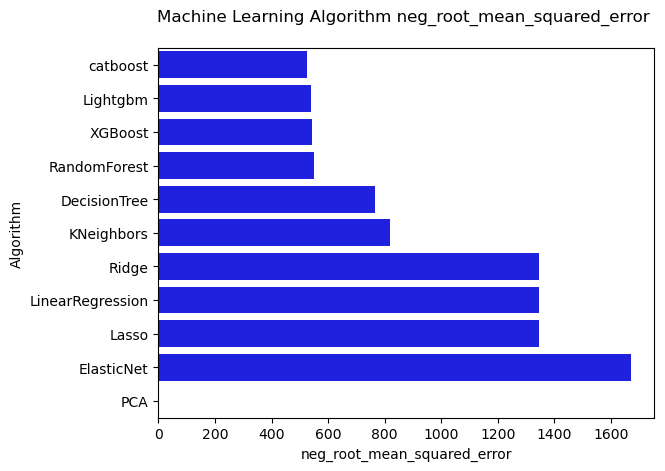

In [107]:
# 'Machine Learning Algorithm on table
sns.barplot(x='neg_root_mean_squared_error', y = 'MLA Name', data = MLA_compare, color = 'b')
plt.title('Machine Learning Algorithm neg_root_mean_squared_error \n')
plt.xlabel('neg_root_mean_squared_error')
plt.ylabel('Algorithm')

In [ ]:
# CatBoost - Model Tuning

In [110]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 30% for validation and testing
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)  # Split validation and testing equally


In [111]:
cat_reg = CatBoostRegressor(iterations=3500,
                            random_state=42,
                            verbose=False)

cat_reg.fit(X_train, y_train, 
            eval_set=(X_val, y_val),
            use_best_model=True,
            verbose=False)

print('CatBoost model is fitted: ' + str(cat_reg.is_fitted()))
print('CatBoost model parameters:')
print(cat_reg.get_params())

# You can access the best iteration using:
best_iteration = cat_reg.get_best_iteration()
print('Best Iteration:', best_iteration)

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 3500, 'loss_function': 'RMSE', 'verbose': False, 'random_state': 42}
Best Iteration: 2584


In [112]:
# Combine X_train and X_val
X_train_val = pd.concat([X_train, X_val], axis=0)

# Combine y_train and y_val
y_train_val = pd.concat([y_train, y_val], axis=0)
# Extract the best iteration
best_iteration = cat_reg.get_best_iteration()

# Create a new CatBoost model using the best iteration
best_cat_reg = CatBoostRegressor(iterations=best_iteration, random_state=42, verbose=False)

# Fit the new model on the entire training data
best_cat_reg.fit(X_train_val, y_train_val)

# Now, best_cat_reg is the model that performed the best on the evaluation set


In [ ]:
# Optimize the parameters

In [114]:
y_pred = best_cat_reg.predict(X_test)

In [115]:
print("R^2:",metrics.r2_score(y_test, y_pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9832576153602958
Adjusted R^2: 0.9832389504944767
MAE: 264.4097968229392
MSE: 257837.38436111214
RMSE: 507.77690412336807
